## Detecção de anomalias através da Transformada Wavelet Discreta (DWT)

### Carga das bibliotecas necessárias e da base de dados de exemplos do Harbinger

In [1]:
source("header.R")
library(ggplot2)
library("harbinger")
data(har_examples)

Loading required package: usethis


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename



Attaching package: ‘TSPred’


The following object is masked from ‘package:base’:

    subset



Attaching package: ‘daltoolbox’


The following objects are masked from ‘package:TSPred’:

    evaluate, minmax


The following object is masked from ‘package:base’:

    transform



Attaching package: ‘harbinger’


The following object is masked _by_ ‘.GlobalEnv’:

    har_plot



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Determinação do limiar da anomalia baseada em:

#### a) Definição de candidatos a anomalias com base em outliers identificados através da função Boxplot aplicada ao vetor dos coeficientes Wavelet;
#### b) Cálculo da distância entre tais candidatos e a distribuição dos coeficientes Wavelet;
#### c) Definição do limiar baseada no menor valor absoludo dentre os candidatos que atenderem ao critério de distância;
#### e) Caso nenhum candidato atenda ao critério de distância, o menos valor absoluto dentro todos os candidatos é selecionado.

#### O único valor escolhido arbitrariamente no algoritmo abaixo é o percentual de descarte das observações iniciais do vetor de coeficientes Wavelet. No momento definido para descnsiderar os 6% iniciais das observações.

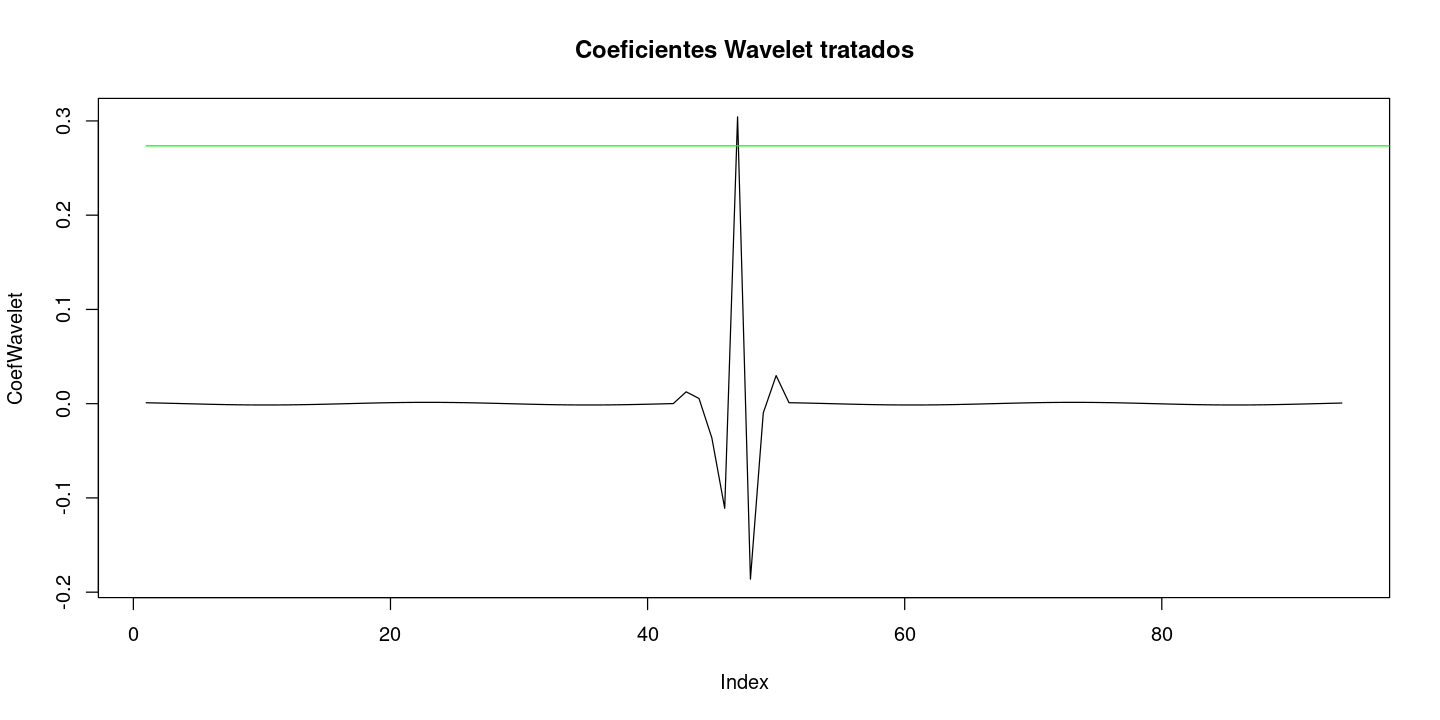

[1] "Candidatos à anomalias:"
[1]  0.012581297  0.005503059 -0.036374145 -0.111035697  0.304289757
[6] -0.186151535 -0.009808974  0.029790509
[1] "Menor limiar absoluto dos candidatos= 0.0055030593337105"
[1] "Erro médio sinal original - predição = 0.000678844833123156 SD= 0.00386050881161621"


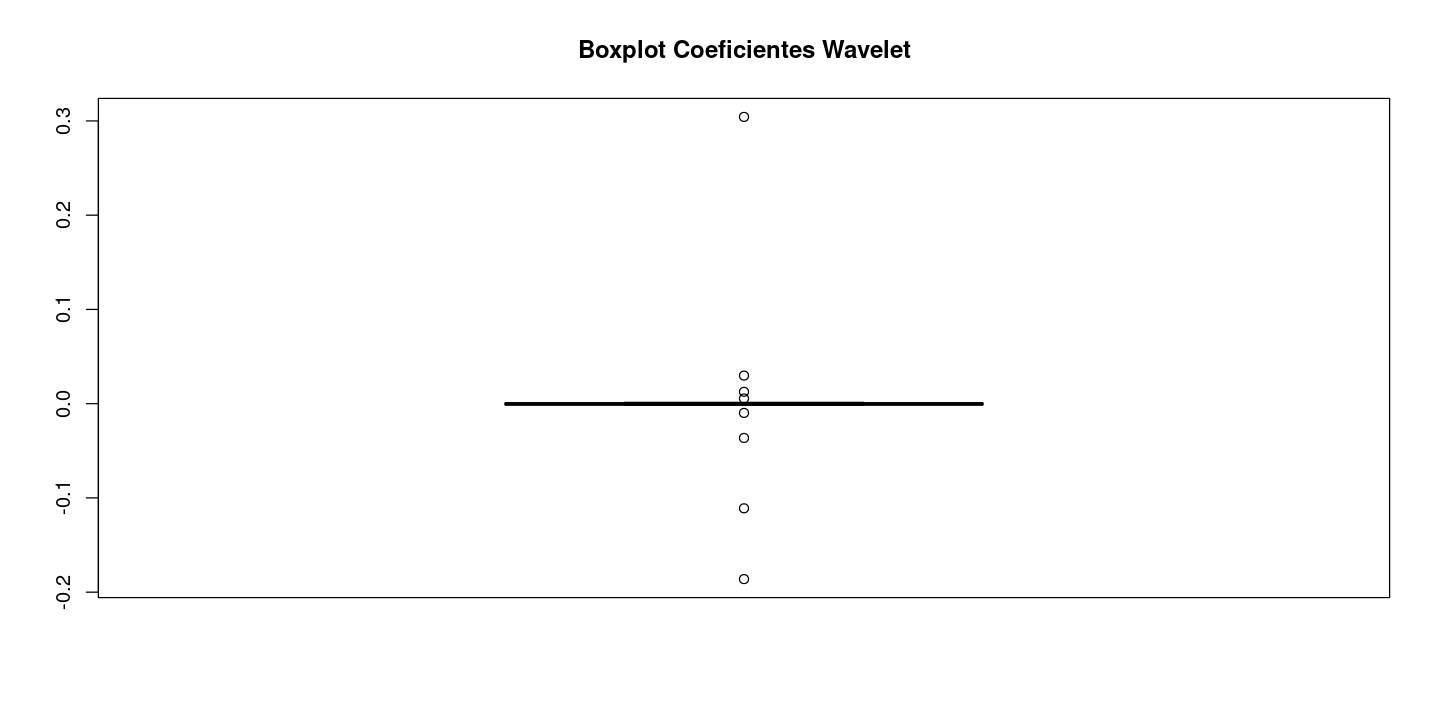

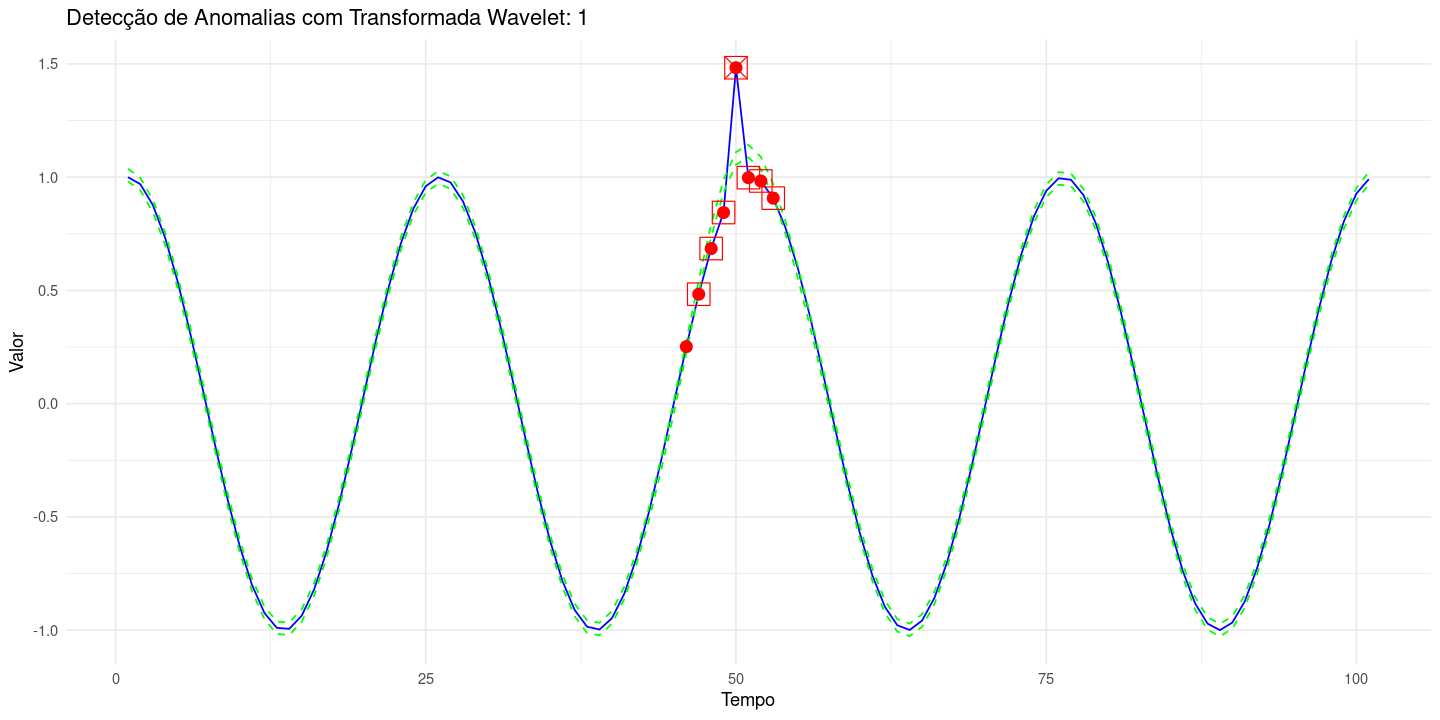

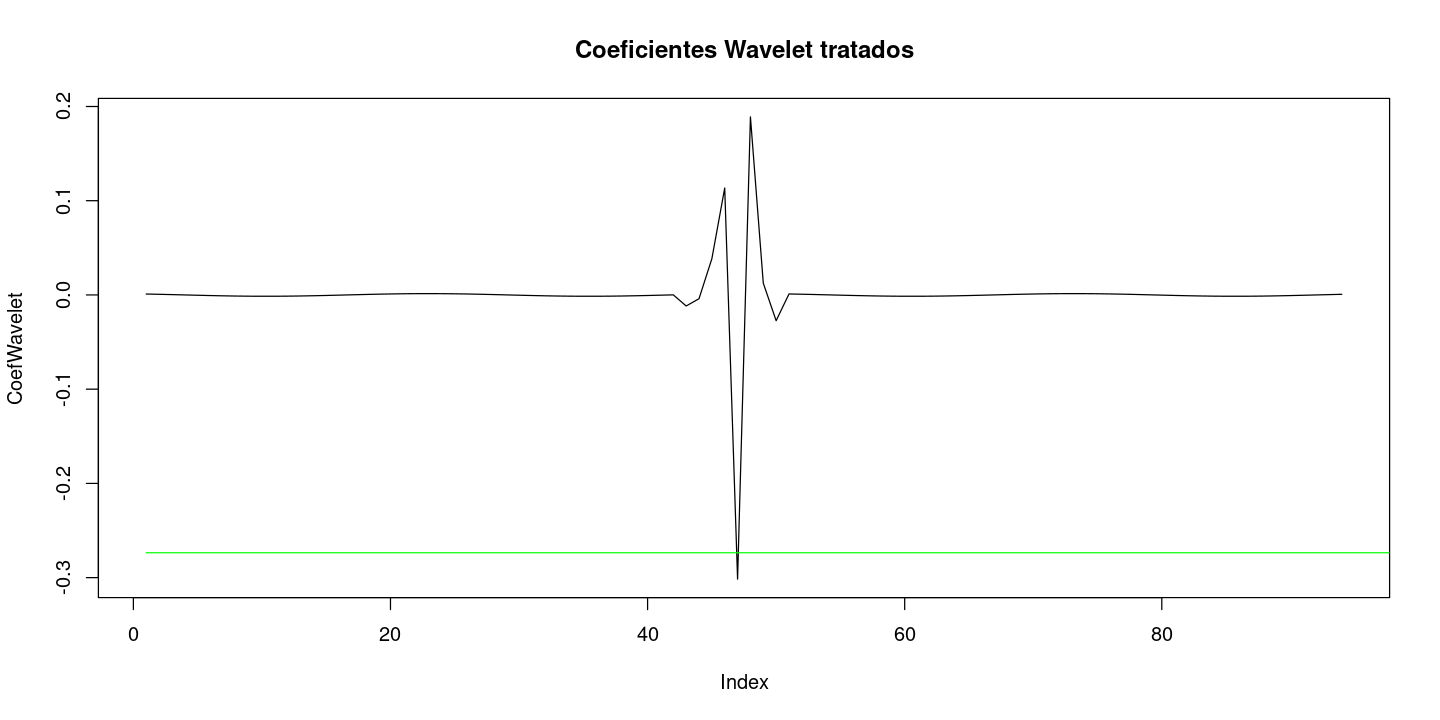

[1] "Candidatos à anomalias:"
[1] -0.011708717 -0.003997905  0.038418289  0.113491737 -0.301574525
[6]  0.188957138  0.012530509 -0.027322253
[1] "Menor limiar absoluto dos candidatos= 0.00399790544512349"
[1] "Erro médio sinal original - predição = 0.000734488500210174 SD= 0.00380437208606091"


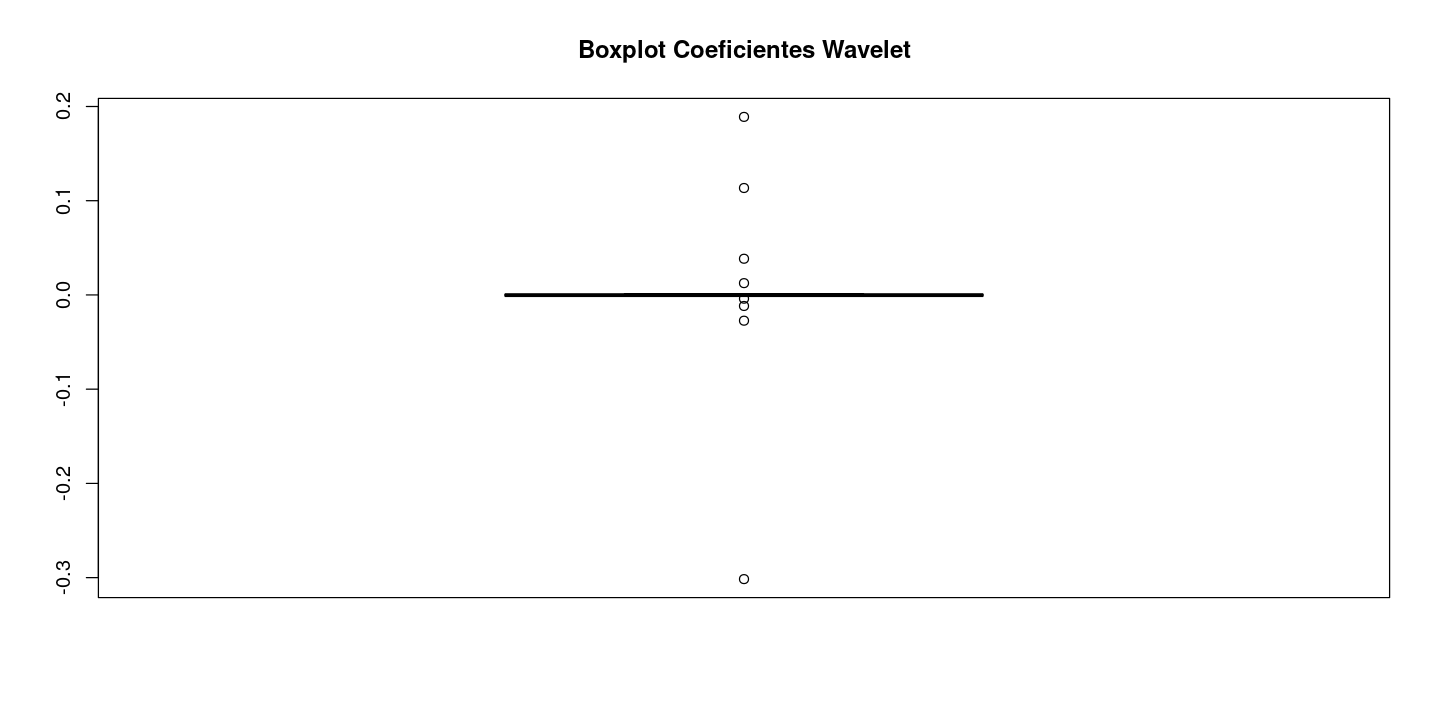

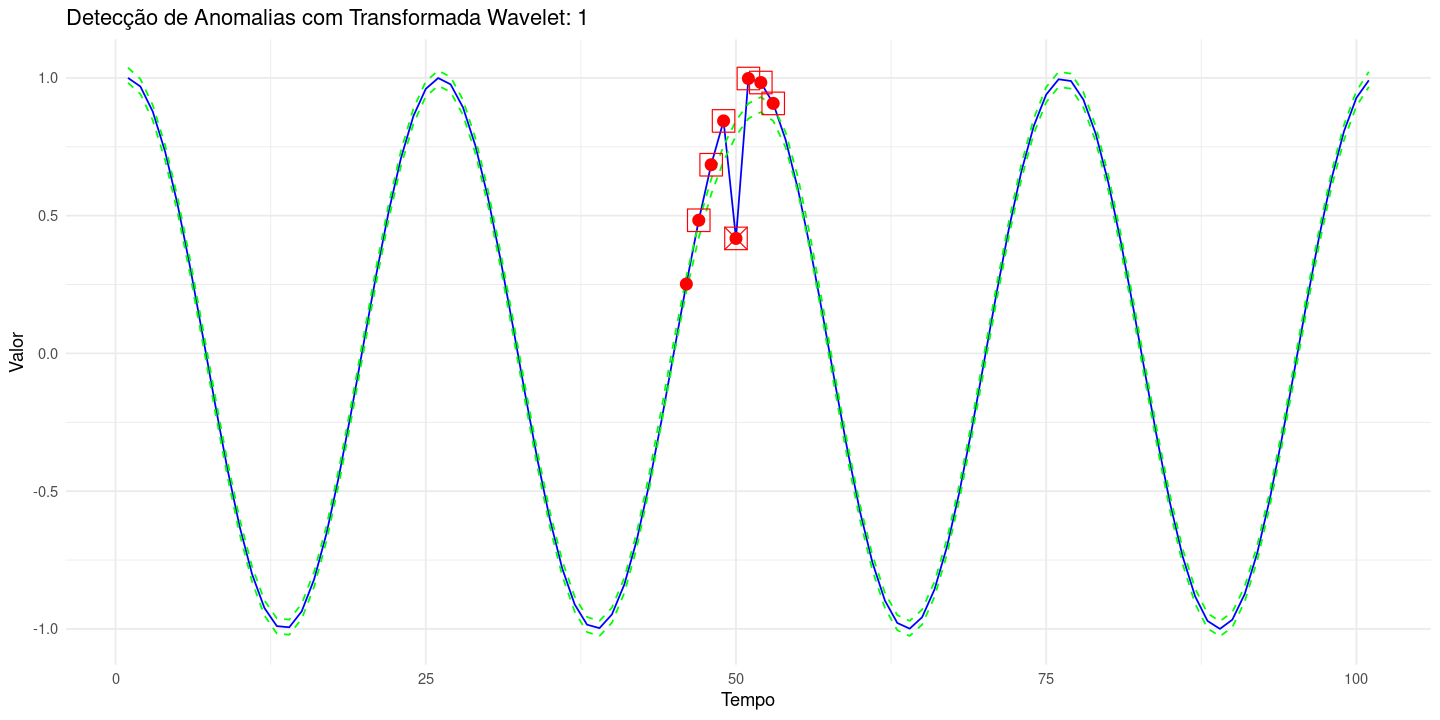

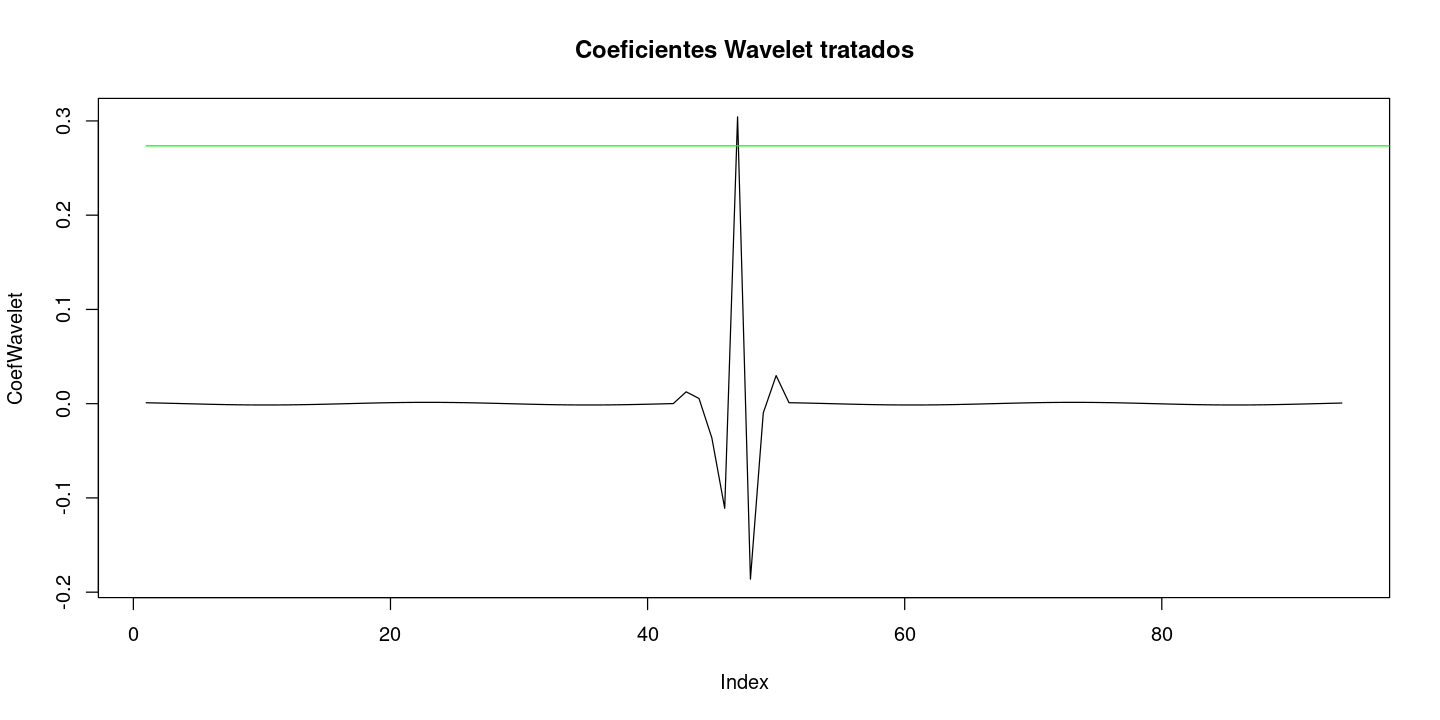

[1] "Candidatos à anomalias:"
[1]  0.012581297  0.005503059 -0.036374145 -0.111035697  0.304289757
[6] -0.186151535 -0.009808974  0.029790509
[1] "Menor limiar absoluto dos candidatos= 0.00550305933370987"
[1] "Erro médio sinal original - predição = 0.000678844833123098 SD= 1.55162184211349"


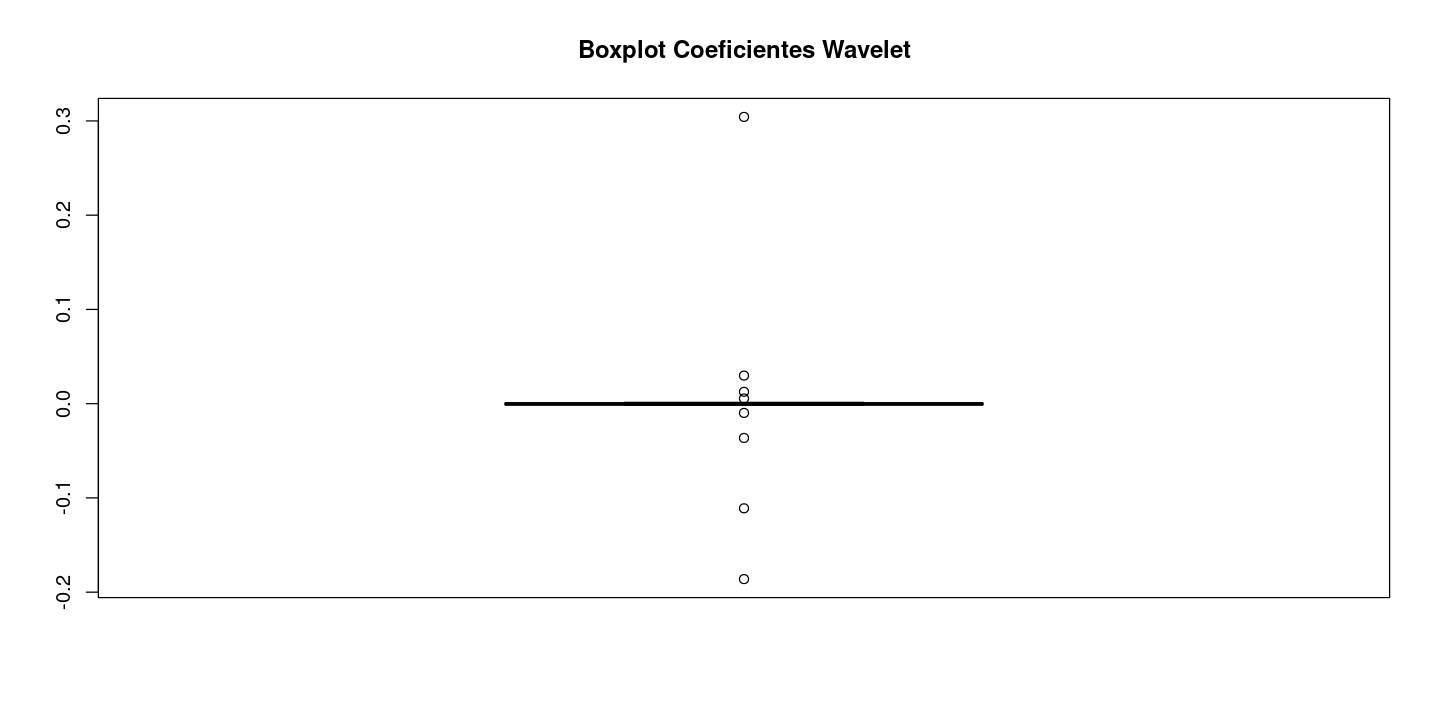

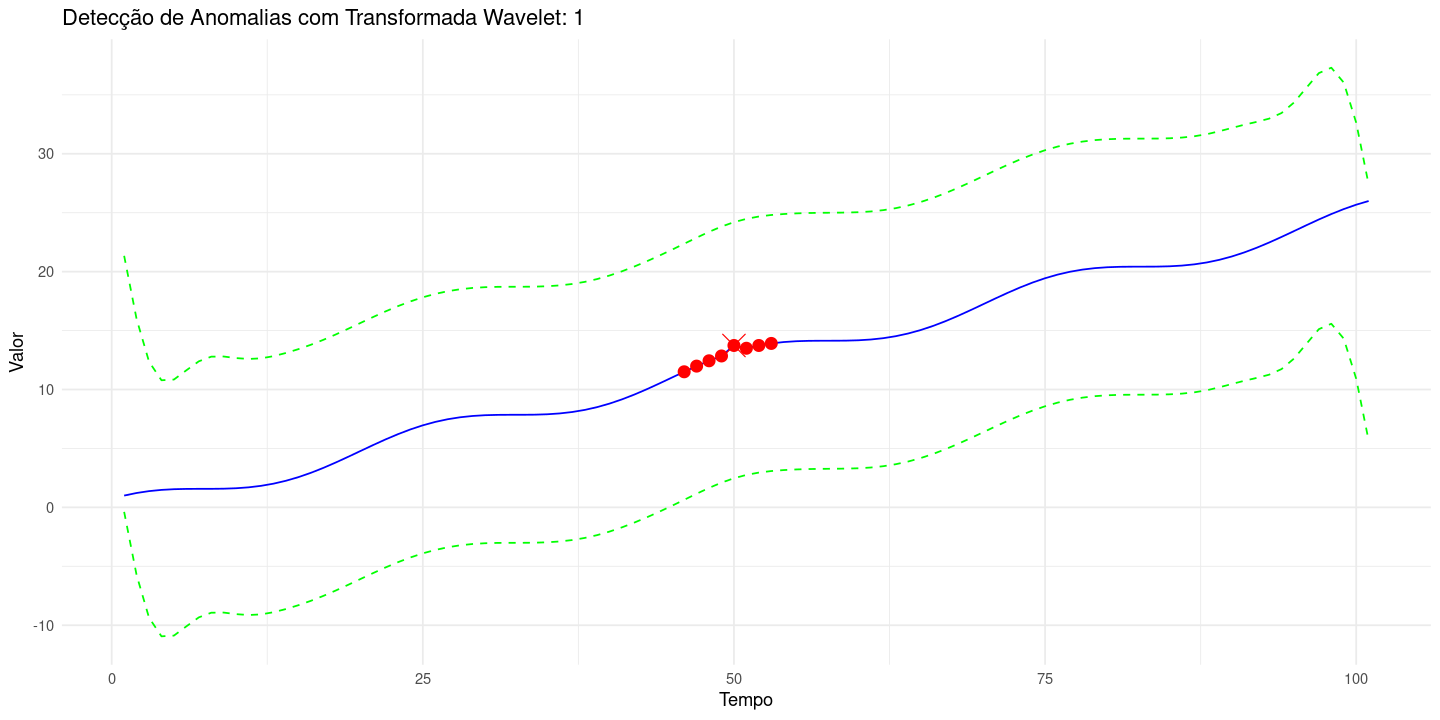

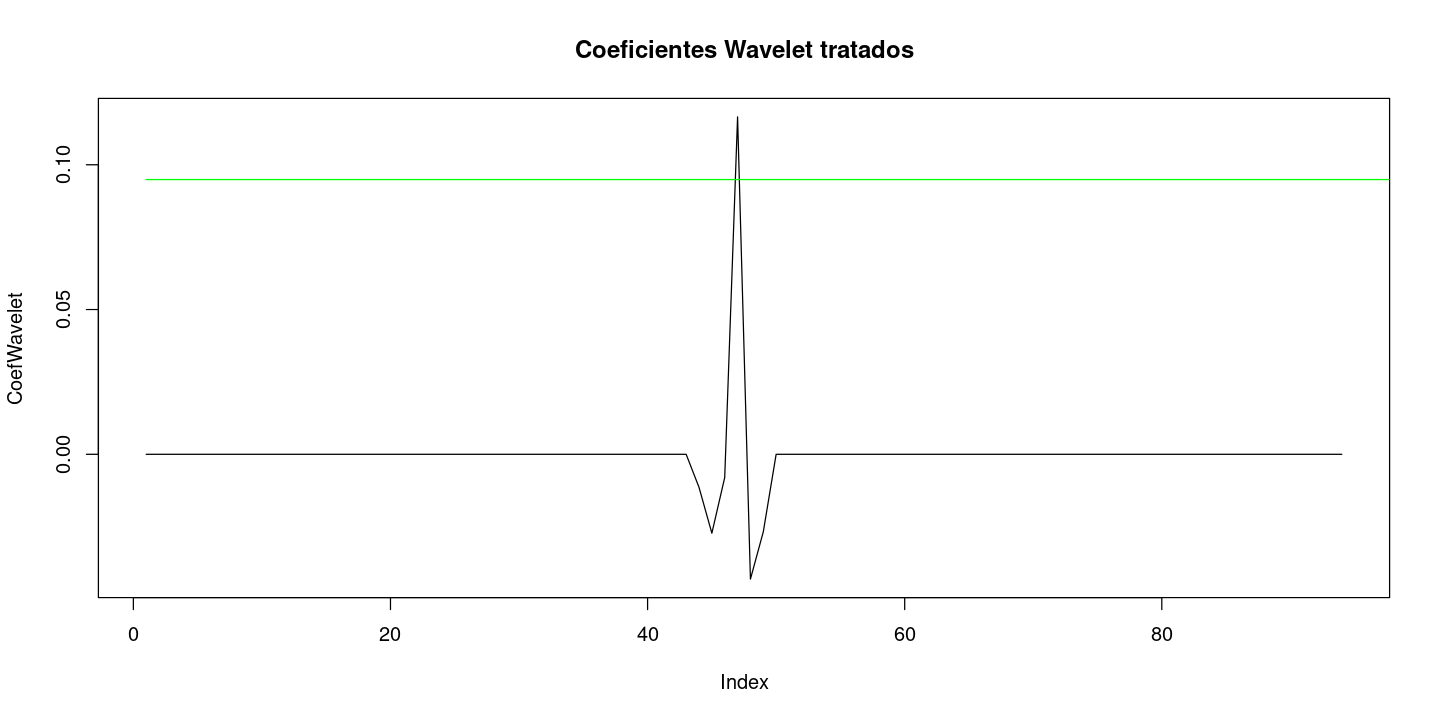

[1] "Candidatos à anomalias:"
[1] -0.011392586 -0.027241348 -0.008010704  0.116528574 -0.043096709
[6] -0.026787225
[1] "Menor limiar absoluto dos candidatos= 0.00801070409824955"
[1] "Erro médio sinal original - predição = 0.00059421052631578 SD= 0.0375882503591427"


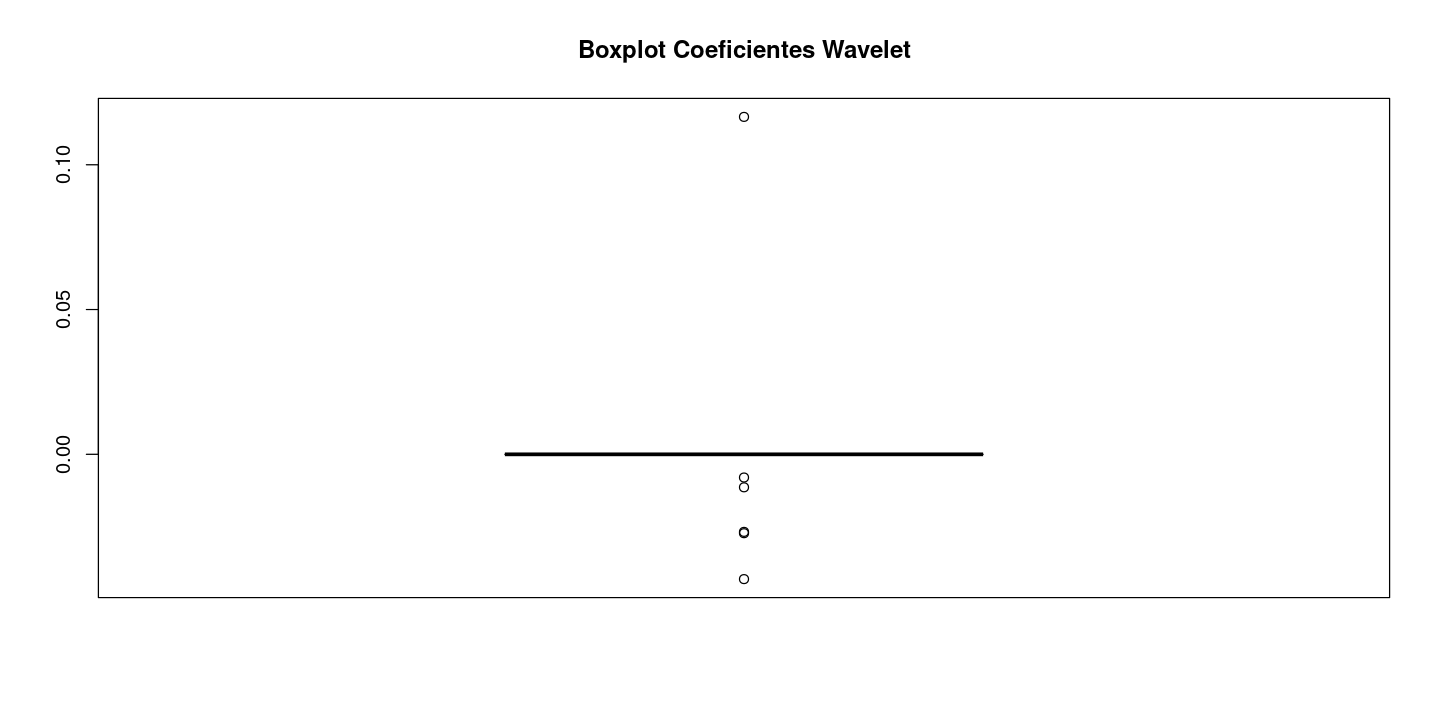

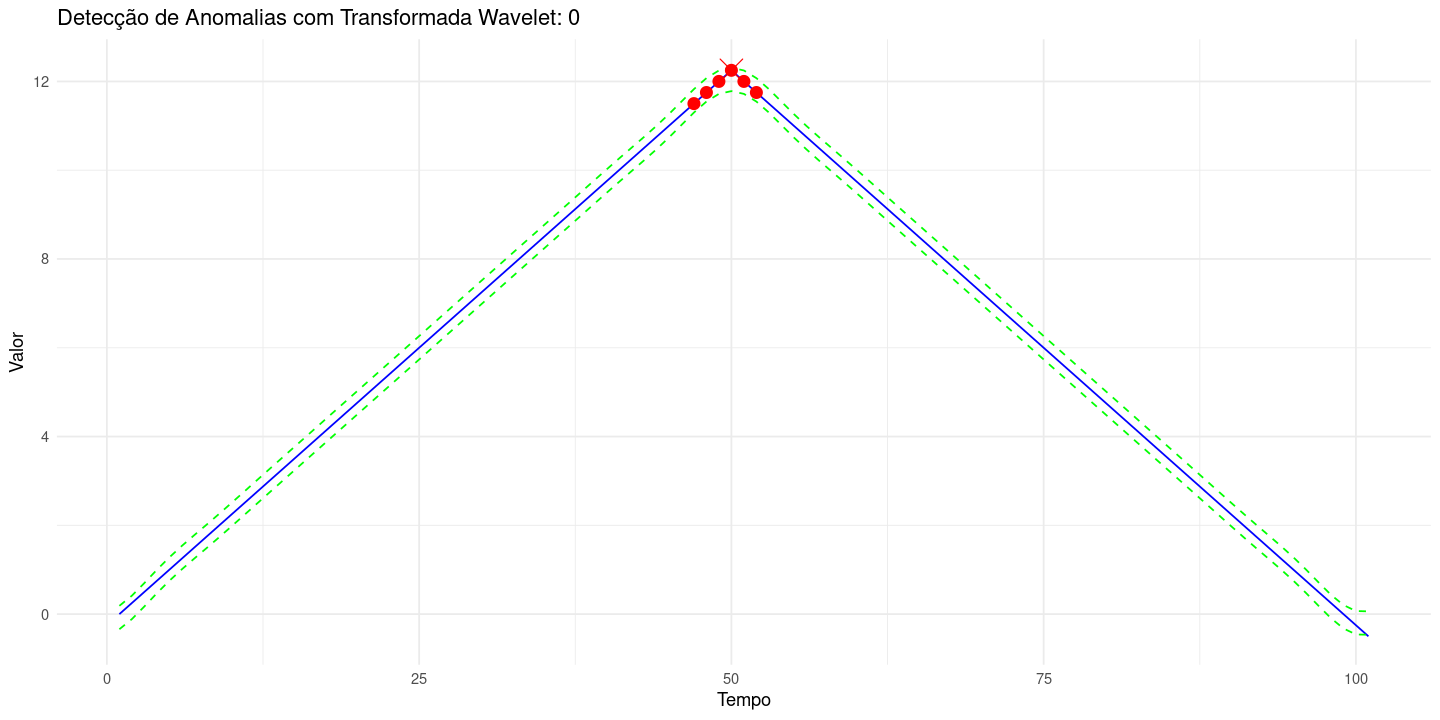

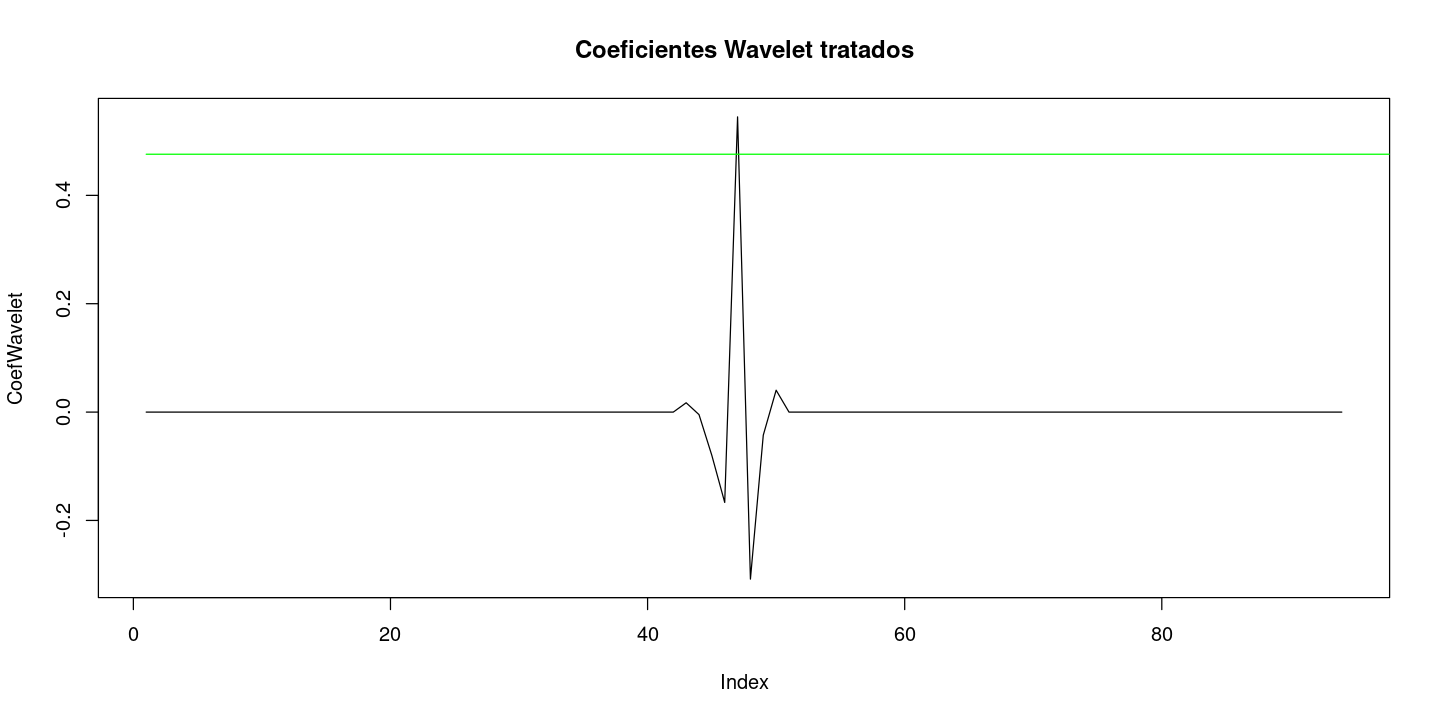

[1] "Candidatos à anomalias:"
[1]  0.017171535 -0.004675993 -0.080114965 -0.166737688  0.544837080
[6] -0.308275299 -0.042579855  0.040375184
[1] "Menor limiar absoluto dos candidatos= 0.00467599307271716"
[1] "Erro médio sinal original - predição = 0.00140623655913977 SD= 0.0379038431834275"


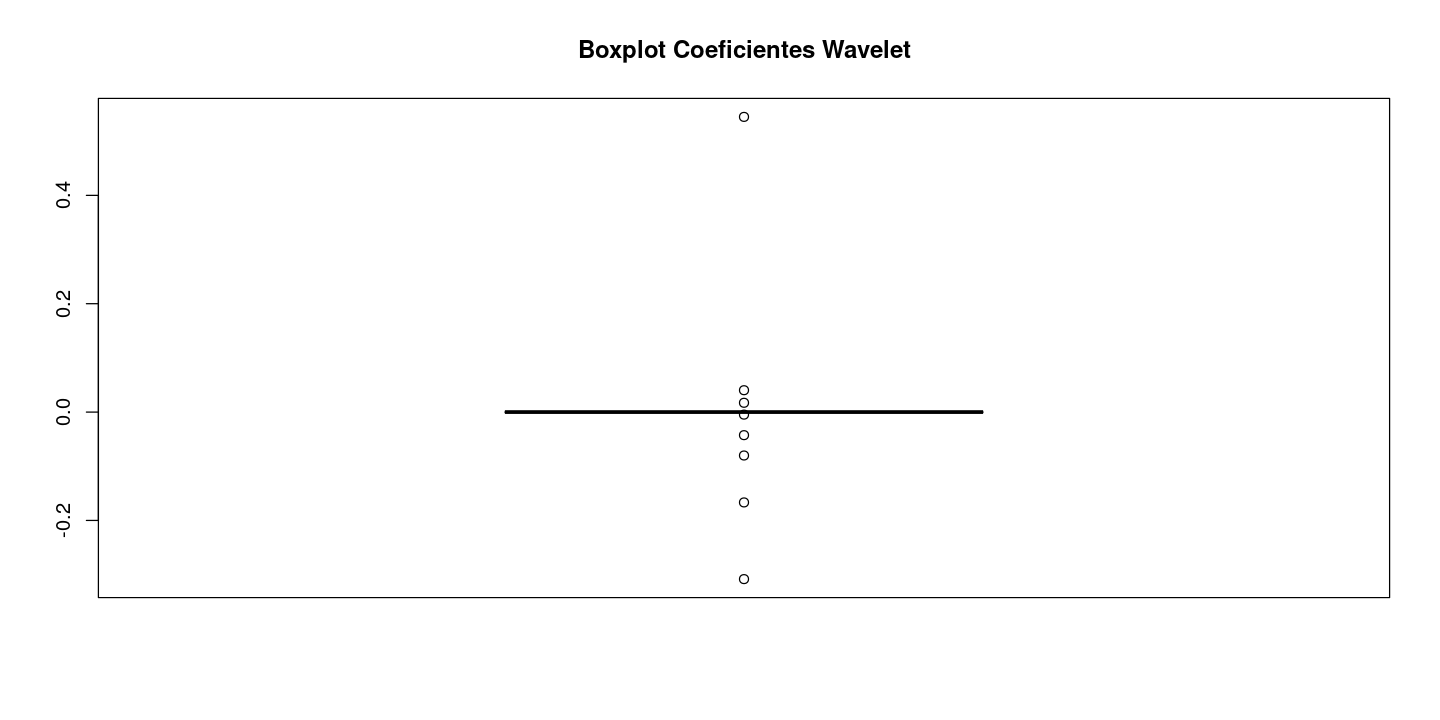

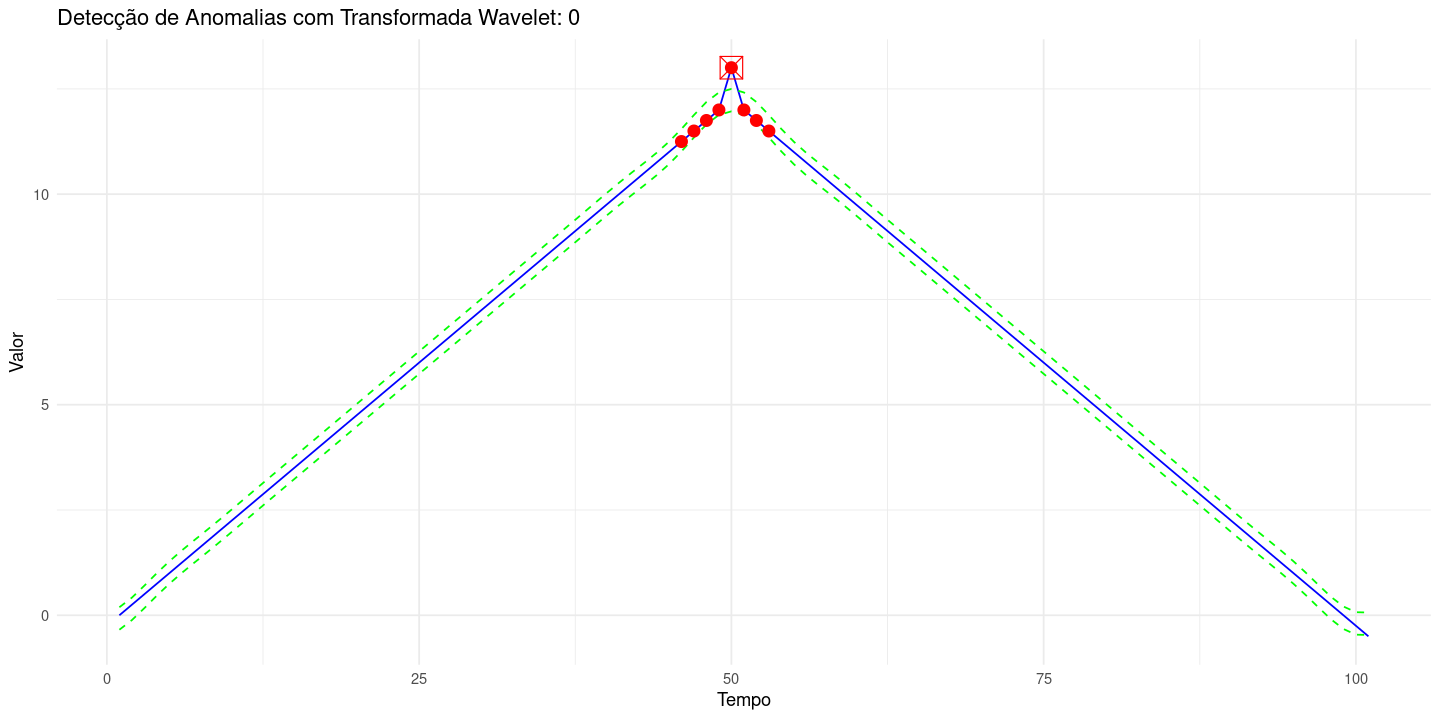

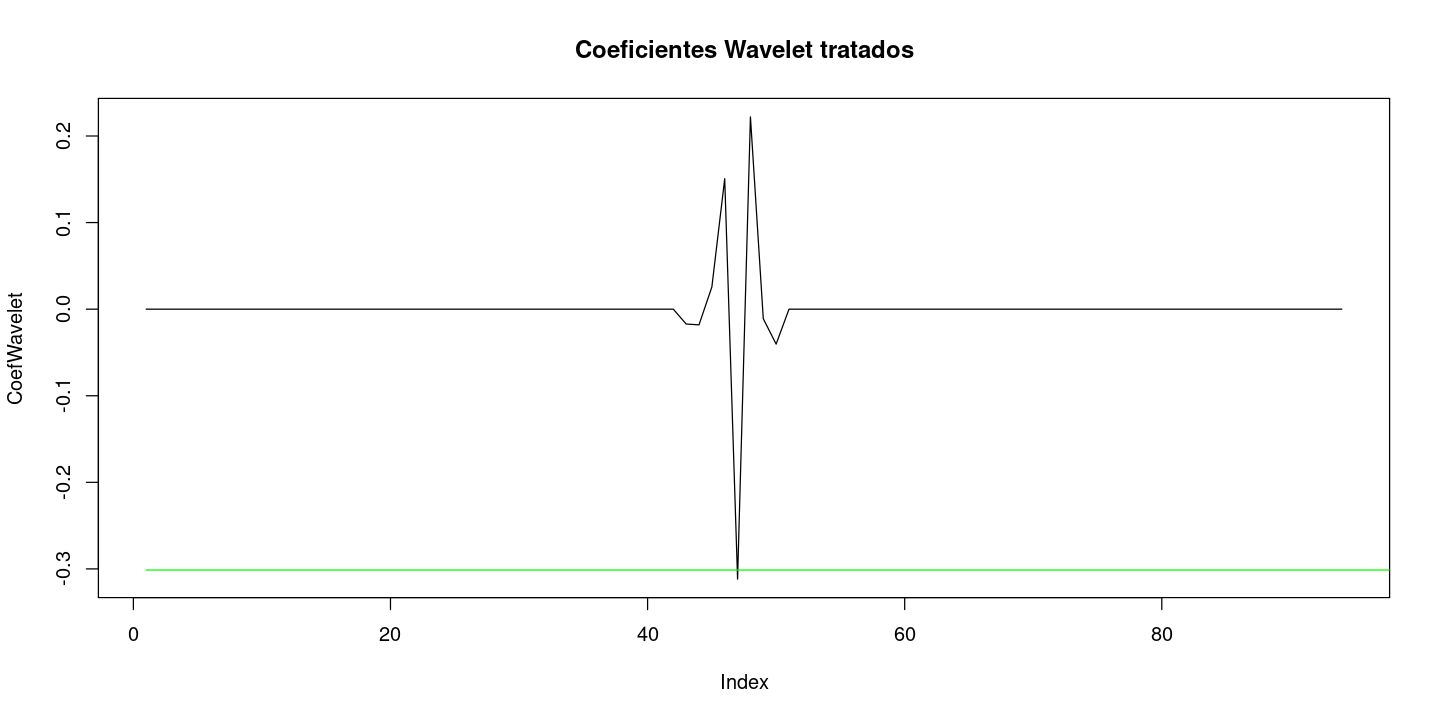

[1] "Candidatos à anomalias:"
[1] -0.01717153 -0.01810918  0.02563227  0.15071628 -0.31177993  0.22208188
[7] -0.01099460 -0.04037518
[1] "Menor limiar absoluto dos candidatos= 0.0109945955191018"
[1] "Erro médio sinal original - predição = 0.000592688172043008 SD= 0.0373428557610533"


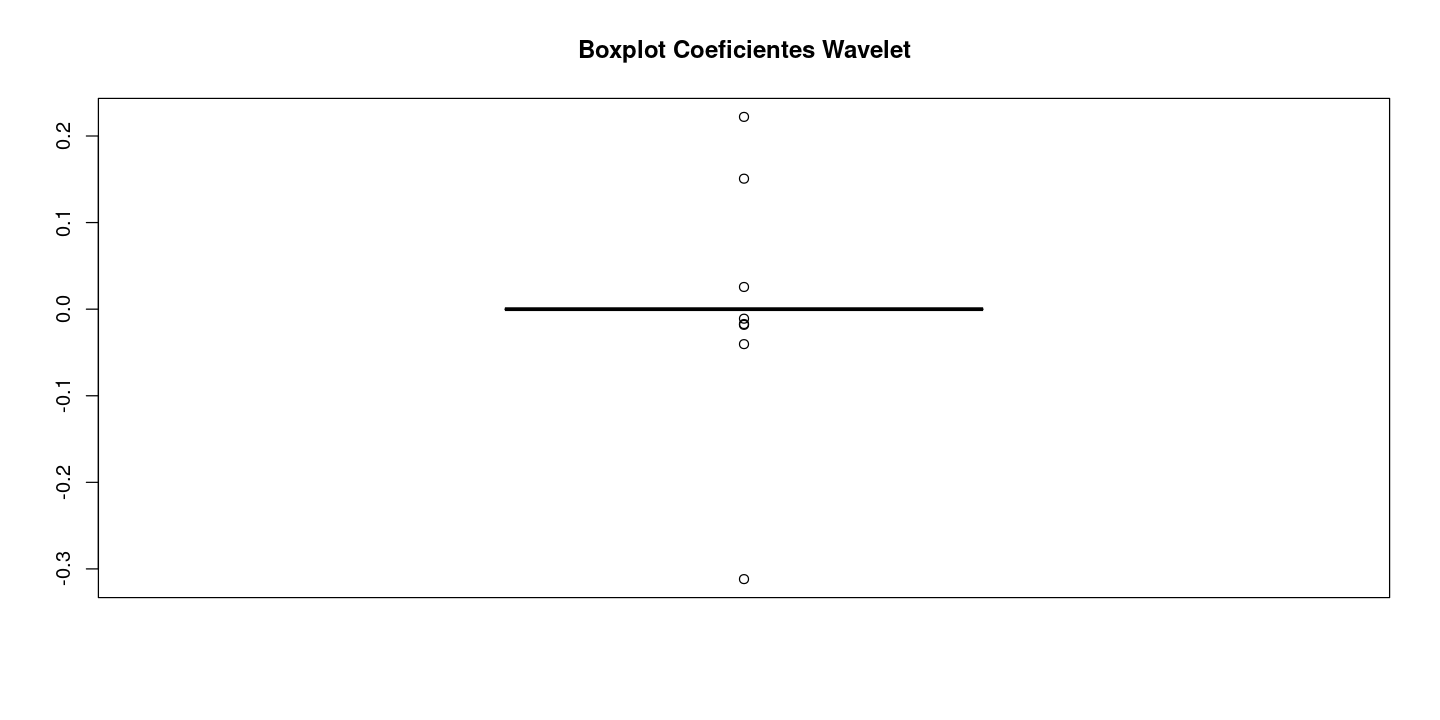

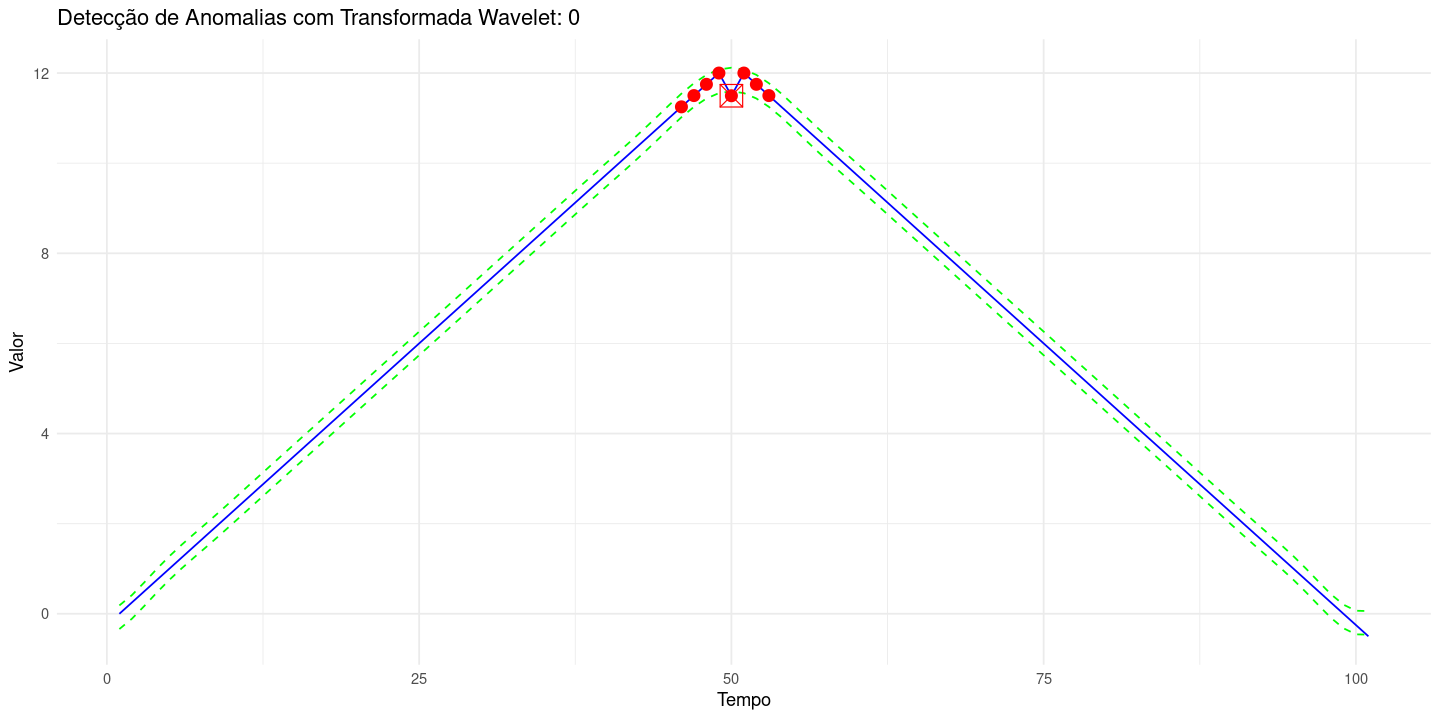

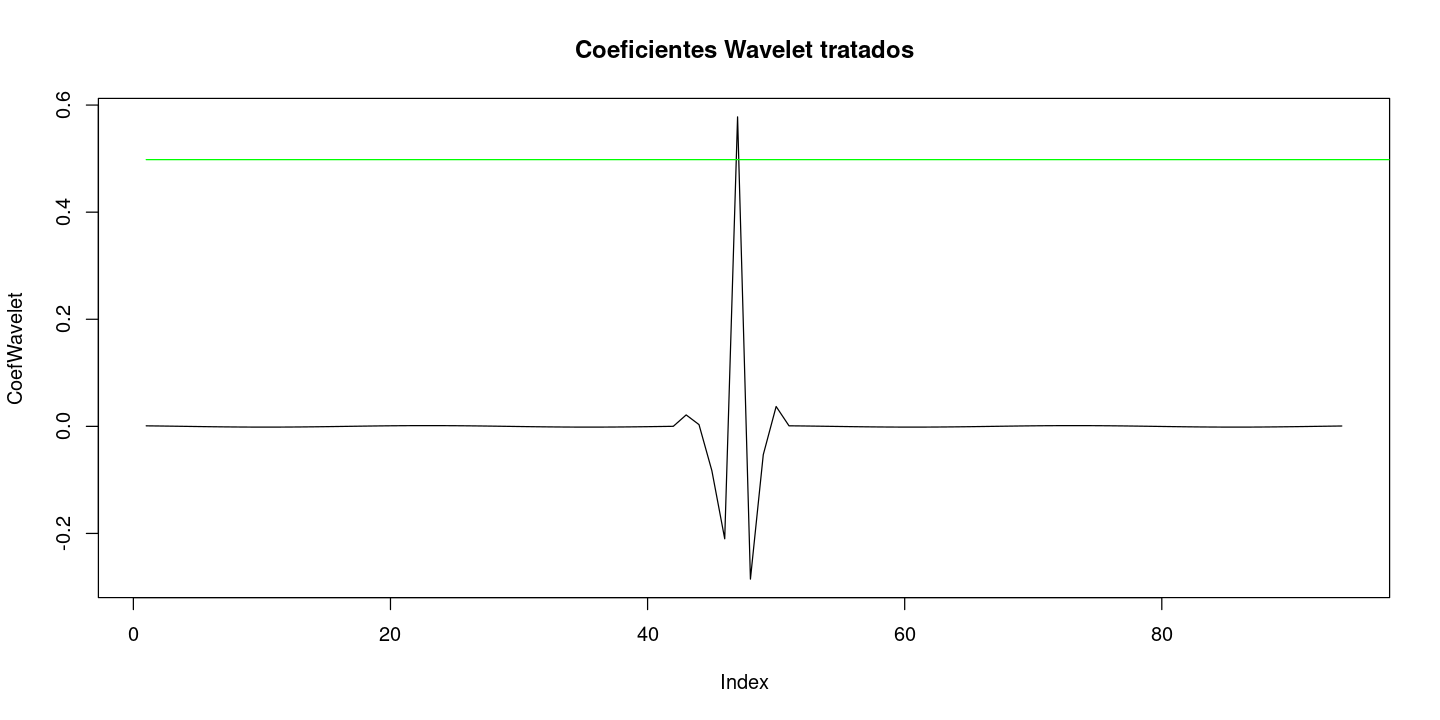

[1] "Candidatos à anomalias:"
[1]  0.02137630 -0.08277218 -0.20995928  0.57792182 -0.28525606 -0.05283969
[7]  0.03707645
[1] "Menor limiar absoluto dos candidatos= 0.0213762973382174"
[1] "Erro médio sinal original - predição = 0.000101567321632573 SD= 0.0301640748416644"


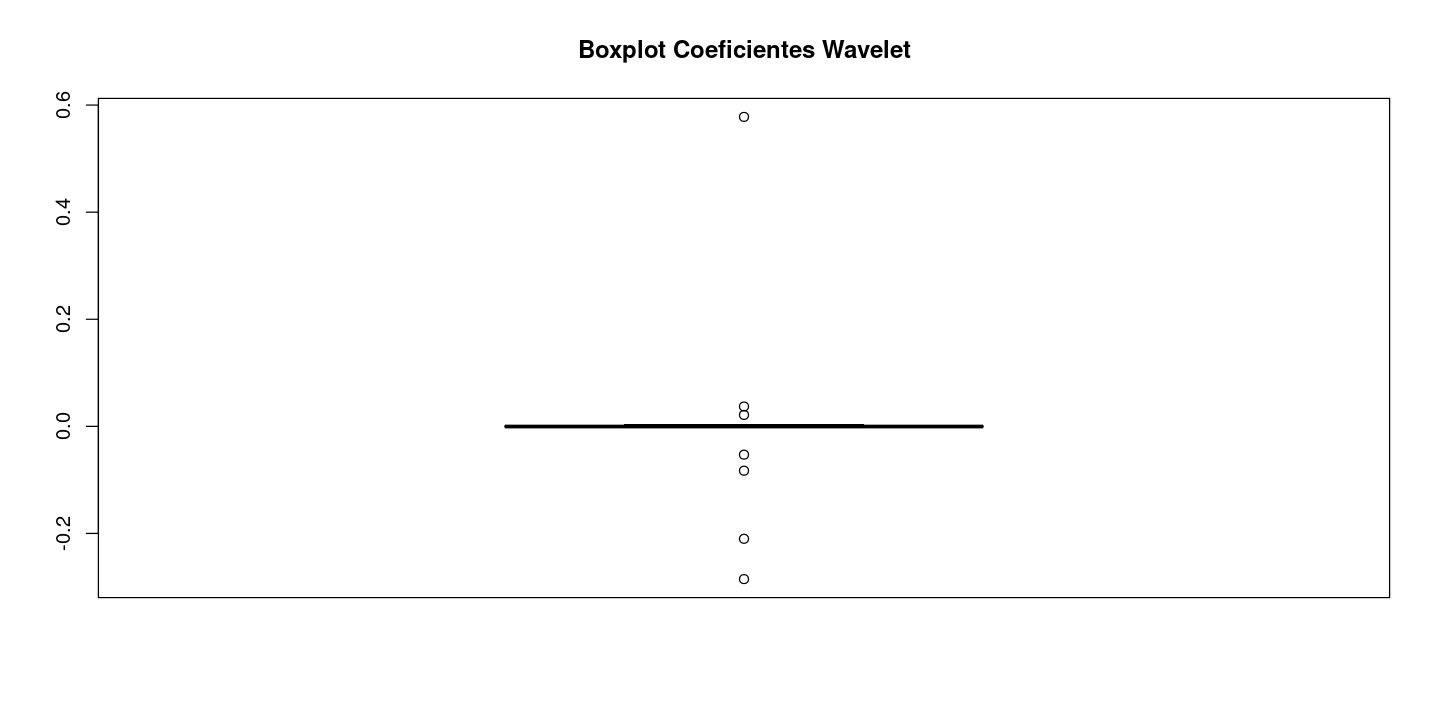

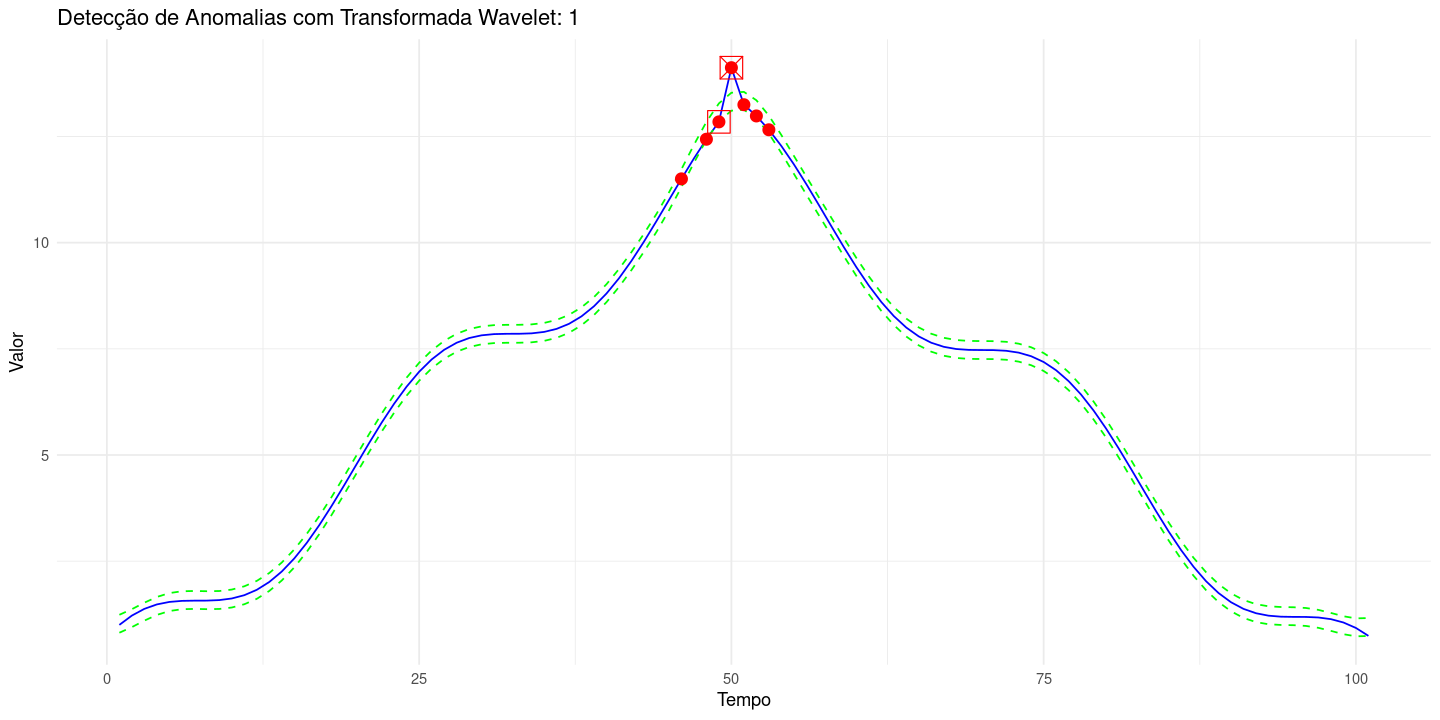

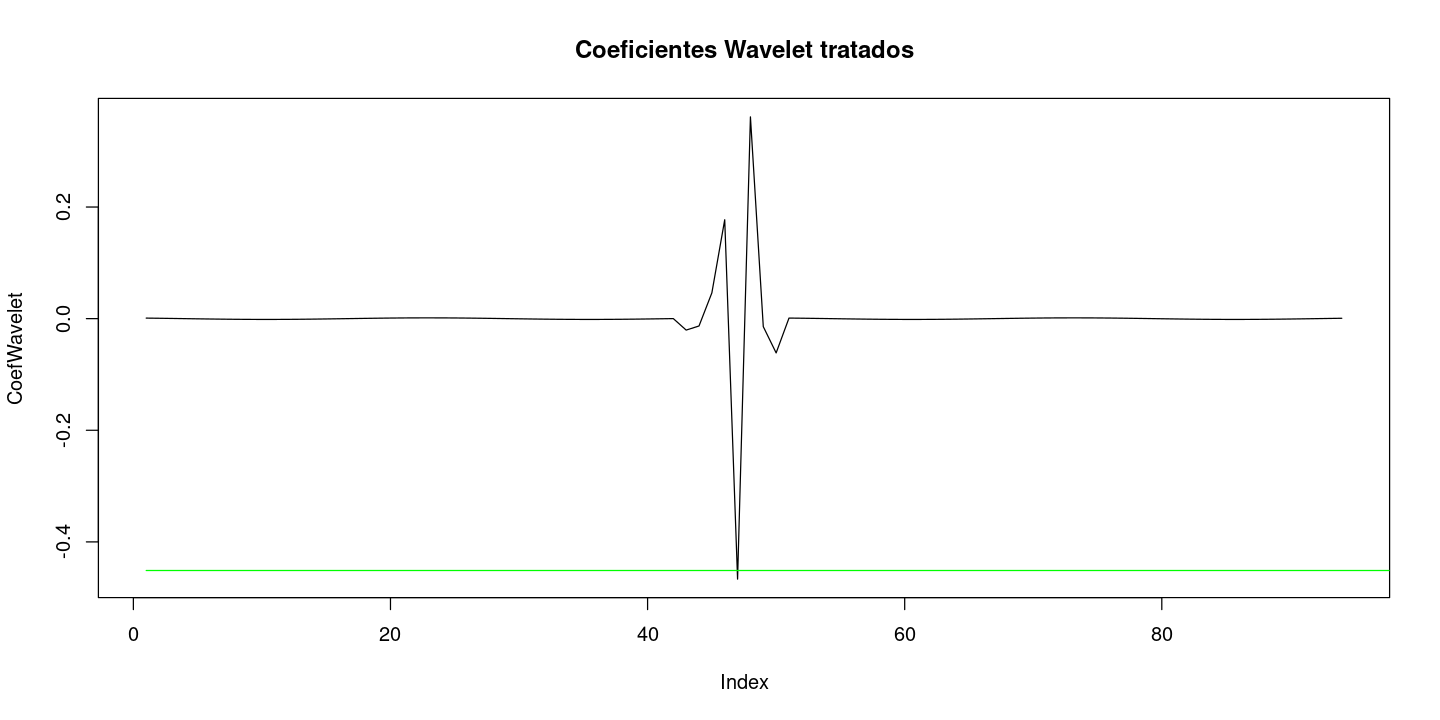

[1] "Candidatos à anomalias:"
[1] -0.02050372 -0.01313434  0.04618239  0.17716327 -0.46668872  0.36149353
[7] -0.01432271 -0.06139542
[1] "Menor limiar absoluto dos candidatos= 0.0131343361402451"
[1] "Erro médio sinal original - predição = 0.00117126269375849 SD= 0.0275369357211485"


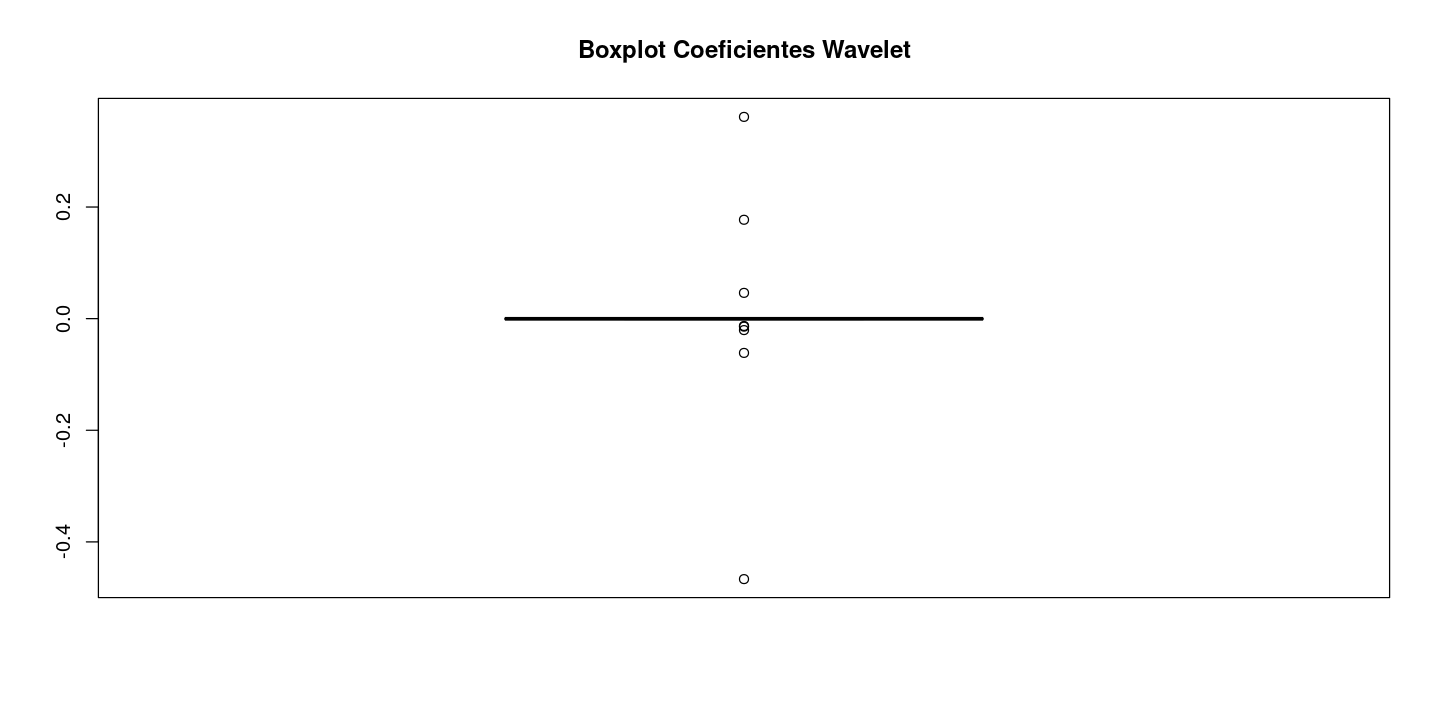

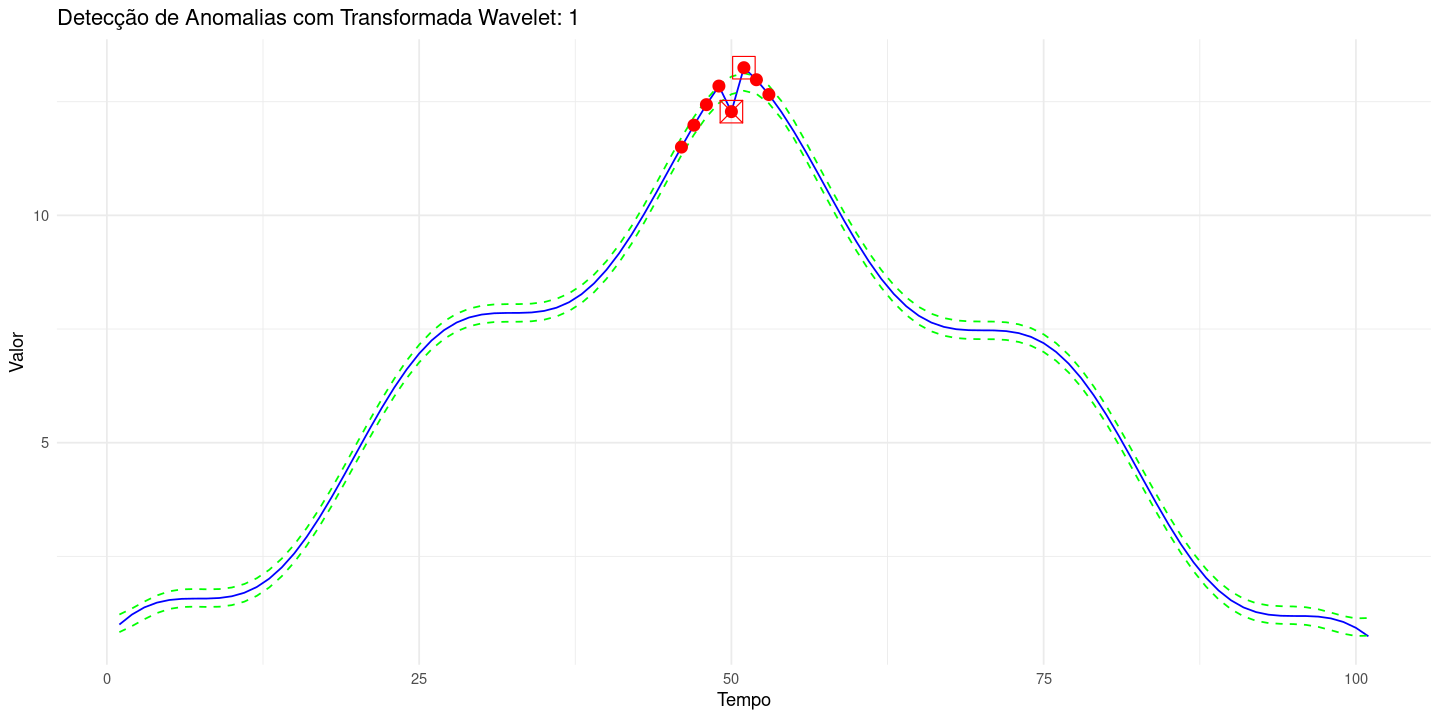

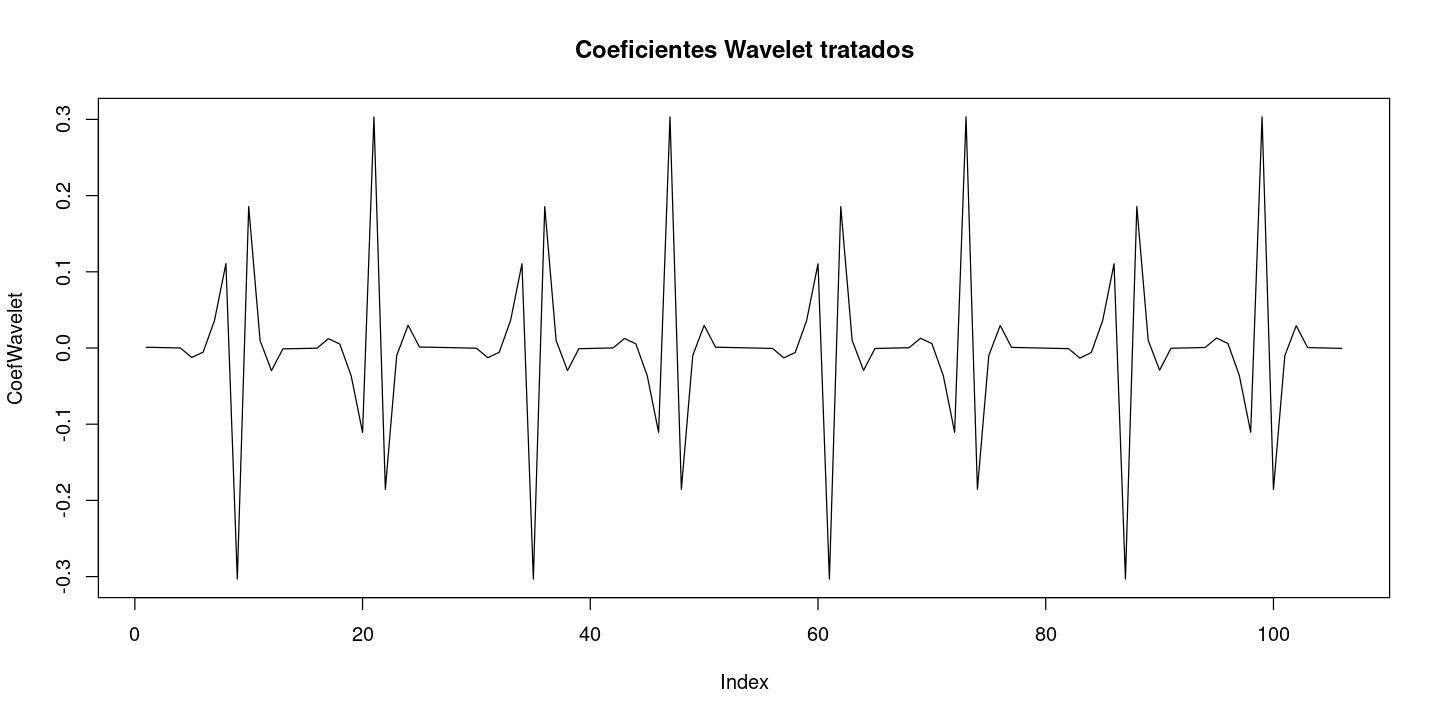

[1] "Candidatos à anomalias:"
 [1]  0.1107070 -0.3032257  0.1855160 -0.1108272  0.3031483 -0.1855457
 [7]  0.1105692 -0.3032923  0.1855247 -0.1106526  0.3032560 -0.1855115
[13]  0.1104928 -0.3032937  0.1855984 -0.1105355  0.3033003 -0.1855430
[19]  0.1104813 -0.3032297  0.1857338 -0.1104813  0.3032788 -0.1856387
[1] "Menor limiar absoluto dos candidatos= 0.110481321669481"
[1] "Erro médio sinal original - predição = 1.21158037539833e-05 SD= 0.135634997513831"


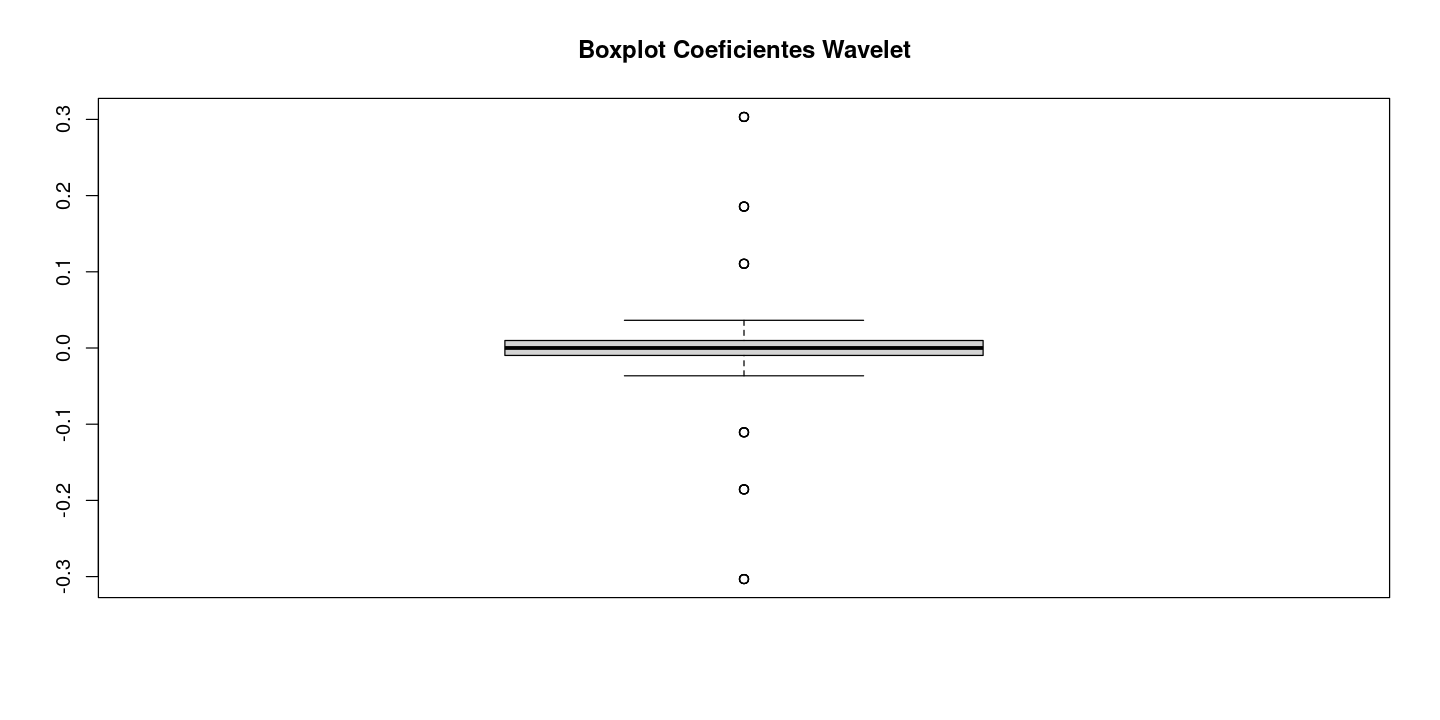

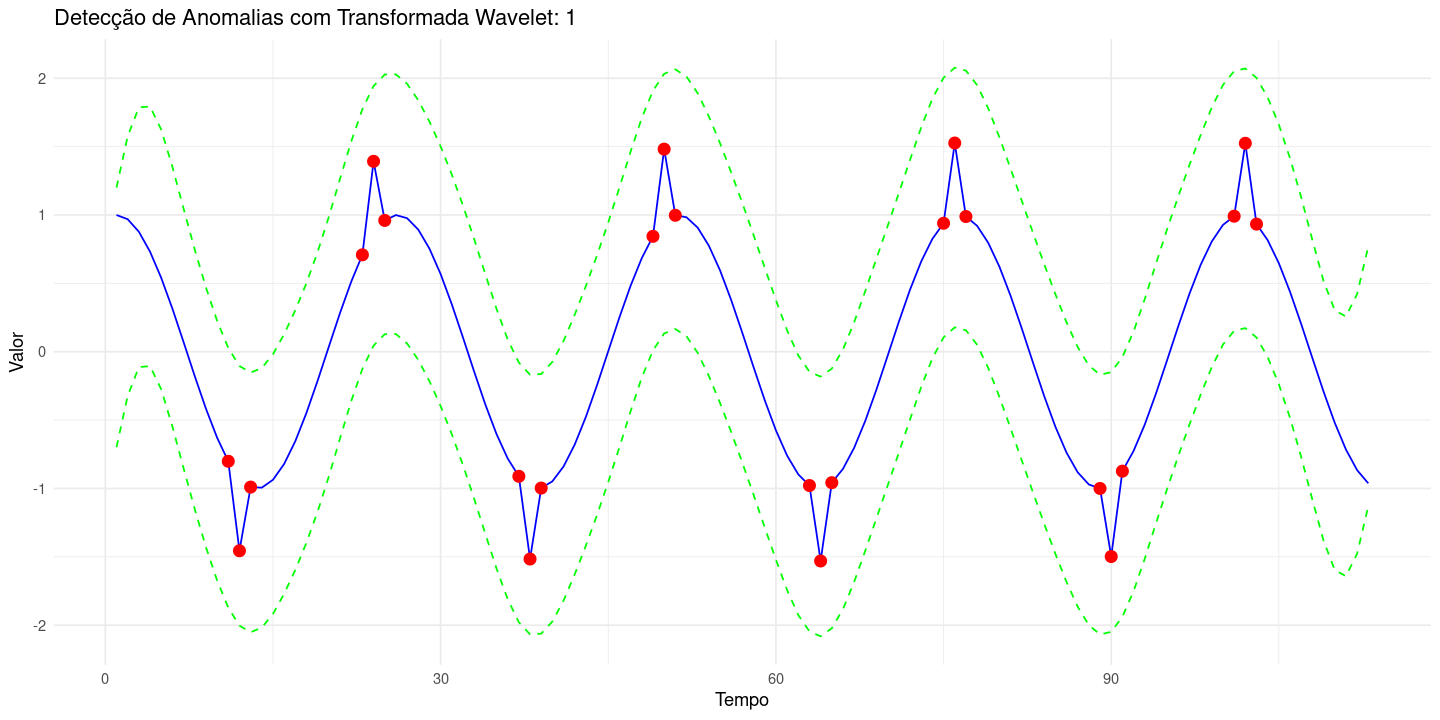

In [6]:
exemplos <- list(har_examples$example1$serie, har_examples$example2$serie, har_examples$example3$serie,
                 har_examples$example4$serie, har_examples$example5$serie, har_examples$example6$serie,
                 har_examples$example7$serie, har_examples$example8$serie, har_examples$example17$serie)

options(repr.plot.width = 12, repr.plot.height = 6)
desvios <- 7

for (exemplo in exemplos){
  data <- exemplo
    # 1) Realizando a Transformada Wavelet Discreta
    wt <- WaveletT(data, filter="la8") # Opções de filtro: "haar", "d4", "la8", "bl14", "c6"
       
    # 2) Calculando o componente de tendência dos coeficientes Wavelet
    wt_ct <- attr(wt,"wt_obj")
    n <- length(wt_ct@V)
    for (i in 1:length(wt_ct@W)) {
      wt_ct@W[[i]] <- as.matrix(rep(0, length(wt_ct@W[[i]])), ncol=1)
    }
    # 2.1 Cálculando a tendência em amplitude com base na transformada Wavelet inversa 
    yhat <- WaveletT.rev(pred=NULL, wt_ct)
    
    # 3) Tratando os coeficientes Waveletwt@W$W1
    CoefWavelet <- wt$W1 
    # 3.1 Desconsiderando APENAS os 6% iniciais do vetor de coeficientes
    descarte <- ceiling(length(CoefWavelet)*0.06)
    CoefWavelet <-  CoefWavelet[-c(1:descarte)]
    #CoefWavelet <-  CoefWavelet[-c((length(CoefWavelet)-descarte+1) : length(CoefWavelet))]

    # 4) Exibindo os coeficientes Wavelet + tolerância
    plot(CoefWavelet, main="Coeficientes Wavelet tratados", type="l")
    cw_tol <- mean(CoefWavelet) + (desvios * sd(CoefWavelet))
    lines(wt_ct@W$W1 + cw_tol, type="l", col="green")
    lines(wt_ct@W$W1 - cw_tol, type="l", col="green")
    
    # 5) Análise de outliers no vetor de coeficientes Wavelet
    candidatos <- boxplot(CoefWavelet, main = "Boxplot Coeficientes Wavelet")$out
    # 5.1 Exibindo os outliers como candidados a anomalias
    print("Candidatos à anomalias:")
    print(candidatos)
    limitecandidato <- min(abs(candidatos))
    # 5.2 Apresenta o menor limiar absoluto dentre os candidatos que atenderam ao critério de distãncia
    print(paste("Menor limiar absoluto dos candidatos=", limitecandidato))
    
    # 6) Marcação dos candidatos à anomalias
    # 6.1 Utilização do valor limiar automático para identificar as anomalias 
    threshold <- limitecandidato                  
    anomaly_wavelet <- which(abs(wt$W1) >= threshold)
    
    # 6.2 Descarte dos 6% iniciais do vetor de coeficientes
    anomaly_wavelet <- anomaly_wavelet[anomaly_wavelet > descarte]
    #anomaly_wavelet <- anomaly_wavelet[anomaly_wavelet < length(CoefWavelet) -descarte] 
    
    # 8) Ajuste do índice da anomalia para "sincronizar" com a série temporal original (W1 tem aproximadamente
    # a metade dos elementos que a série temporal original)
    anomaly <- (anomaly_wavelet * length(data) / length(wt$W1)) - 4
    anomaly <-  anomaly[anomaly > 0]
    #print(paste("Índice=", anomaly, "y_anomalia=", data[anomaly]))
    
    ySemCandidatos <- data
    ySemCandidatos <- ySemCandidatos[-anomaly]
    yhatSemCandidatos <- yhat
    yhatSemCandidatos <- yhatSemCandidatos[-anomaly]
    
    E <- abs(mean(ySemCandidatos-yhatSemCandidatos))
    DP <- sd(ySemCandidatos-yhatSemCandidatos)
    Tolerancia <- E + (desvios * DP)
    print(paste("Erro médio sinal original - predição =", E, "SD=", DP))
   
    anomaly_cw_tol <- which(abs(wt$W1) > cw_tol)
    anomaly_cw_tol <- anomaly_cw_tol[anomaly_cw_tol > descarte]
    anomaly_cw_tol <- (anomaly_cw_tol * length(data) / length(wt$W1)) - 4
    anomaly_cw_tol <- anomaly_cw_tol[anomaly_cw_tol > 0]
    
    anomaly_ap_tol <- c()
    for(anomalia in anomaly){
        if(data[anomalia] > yhat[anomalia] + Tolerancia || data[anomalia] < yhat[anomalia] - Tolerancia){
            anomaly_ap_tol <- c(anomaly_ap_tol, anomalia)
        }
    }
    
    
    # 9) Exibição do gráfico com a marcação da anomalia na série temporal original
    t <- 1:length(data)
    anomalia <- ggplot() + 
                geom_line(aes(x=t, y=data), color="blue") +
                #geom_line(aes(x=t, y=yhat), color="green", linetype = "dotted") +
                geom_line(aes(x=t, y=yhat+Tolerancia), color="green", linetype = "dashed") +
                geom_line(aes(x=t, y=yhat-Tolerancia), color="green", linetype = "dashed") +
                geom_point(aes(x=t[anomaly], y=data[anomaly]), color="red", size=3) +
                geom_point(aes(x=t[anomaly_cw_tol], y=data[anomaly_cw_tol]), color="red", size=6, shape=4) +
                geom_point(aes(x=t[anomaly_ap_tol], y=data[anomaly_ap_tol]), color="red", size=6, shape=0) +
                labs(title=paste("Detecção de Anomalias com Transformada Wavelet:", exemplo), x="Tempo", y="Valor") +
                theme_minimal()
    plot(anomalia)
}

### Teste com as series  temporais do Janio.

In [3]:
#Install package
library(devtools)
#devtools::install_github("cefet-rj-dal/event_datasets", force=TRUE)
library(dalevents)


series,event
<dbl>,<dbl>
0.00000000,0
0.09175796,0
0.17229675,0
0.22621935,0
0.17635798,0
0.09049125,0


[1] "Qtd eventos= 2"


     series            event         
 Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.03843   1st Qu.:0.000000  
 Median :0.06952   Median :0.000000  
 Mean   :0.07970   Mean   :0.001409  
 3rd Qu.:0.10587   3rd Qu.:0.000000  
 Max.   :0.78713   Max.   :1.000000  

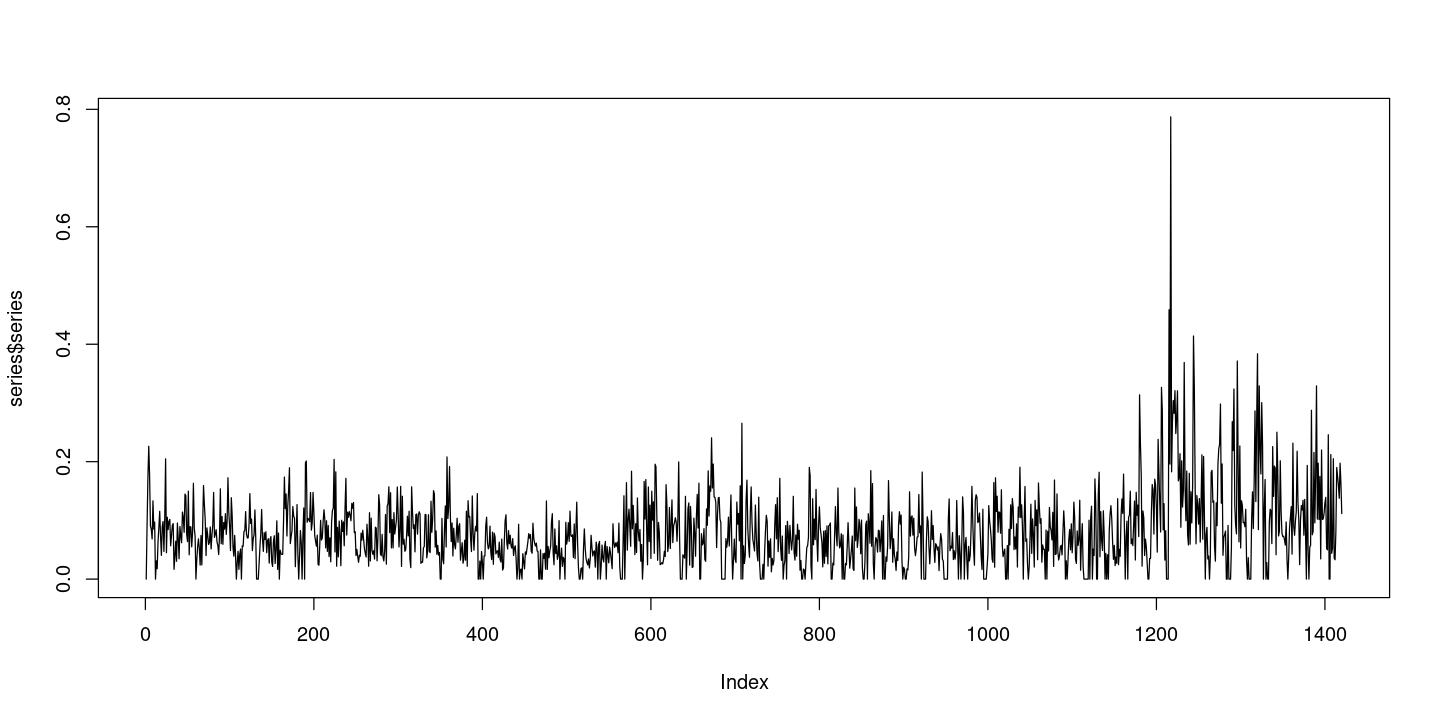

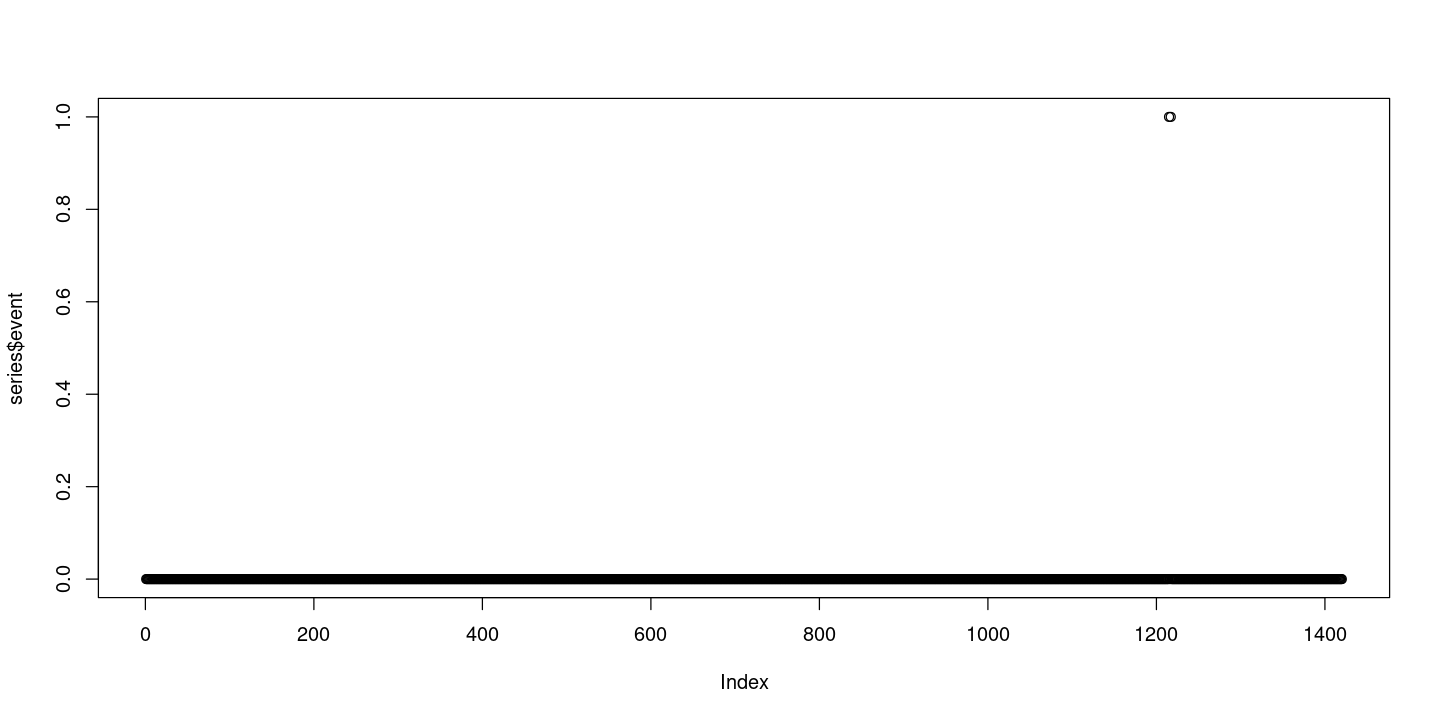

In [4]:
#Load a series
data(yahoo_a1)

series <- yahoo_a1$real_1

head(series)
print(paste("Qtd eventos=", sum(series$event)))

#Use the loaded series
summary(series)
plot(series$series, type = "l")
plot(series$event)

#Get information about a series
#?yahoo_a1

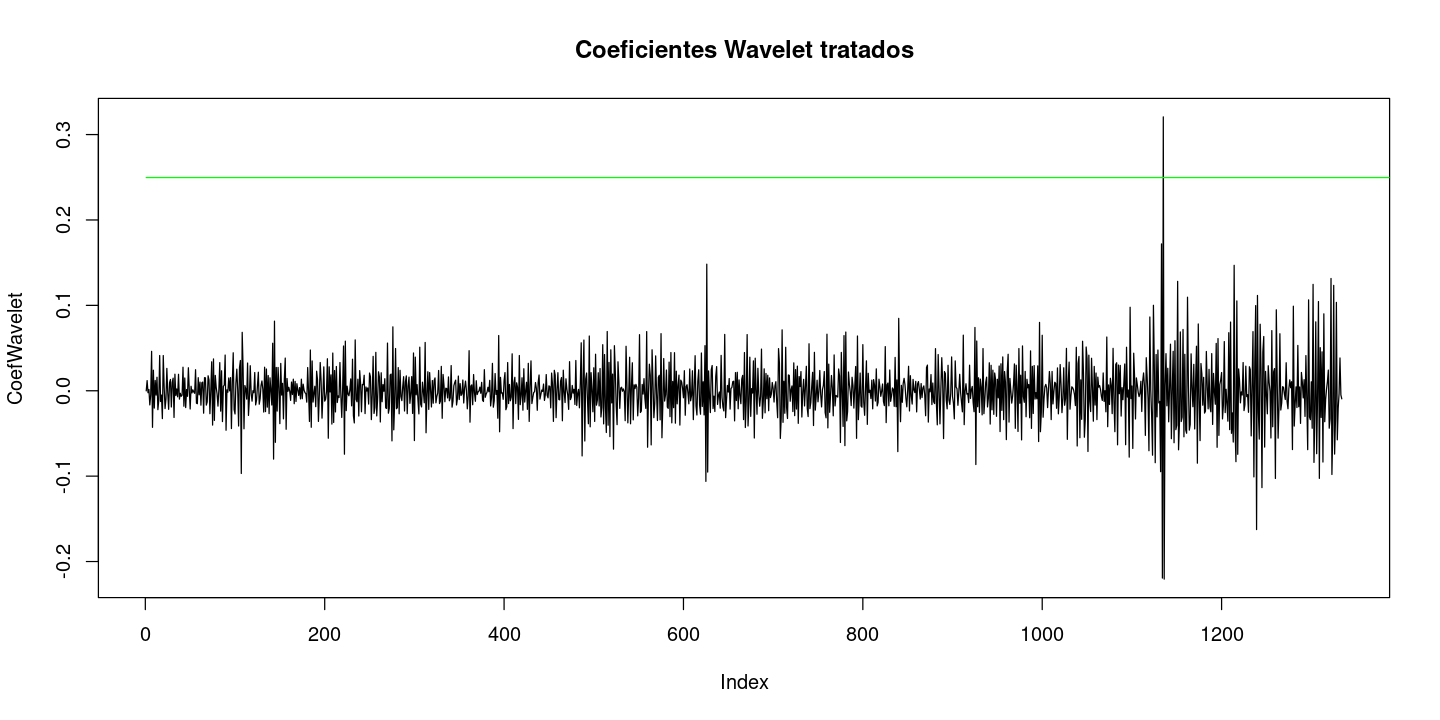

[1] "Candidatos à anomalias:"
 [1] -0.09687775 -0.08004483  0.08148340  0.07479598 -0.07630937 -0.10611357
 [7]  0.14818084 -0.09521121  0.08473538  0.07407719 -0.08637535  0.08000260
[13] -0.07771592  0.09773970  0.08633858 -0.07546101  0.10005111 -0.08424645
[19] -0.09476130  0.17192823 -0.21934137  0.32067933 -0.22057726  0.12806063
[25]  0.10952472 -0.08480659  0.07817787  0.08042269  0.14686355 -0.08304712
[31]  0.10514131 -0.10086704  0.09969398 -0.16256385  0.11157314  0.07786347
[37] -0.11341821 -0.10270519  0.09476490  0.09899004  0.10639015  0.12453988
[43] -0.08389104  0.08063735  0.10442916 -0.10261547 -0.08346434  0.09003353
[49]  0.13144305 -0.09803951  0.12335738  0.10344139
[1] "Menor limiar absoluto dos candidatos= 0.0740771922256641"
[1] "Erro médio sinal original - predição = 0.000380163807735477 SD= 0.0256706474609446"


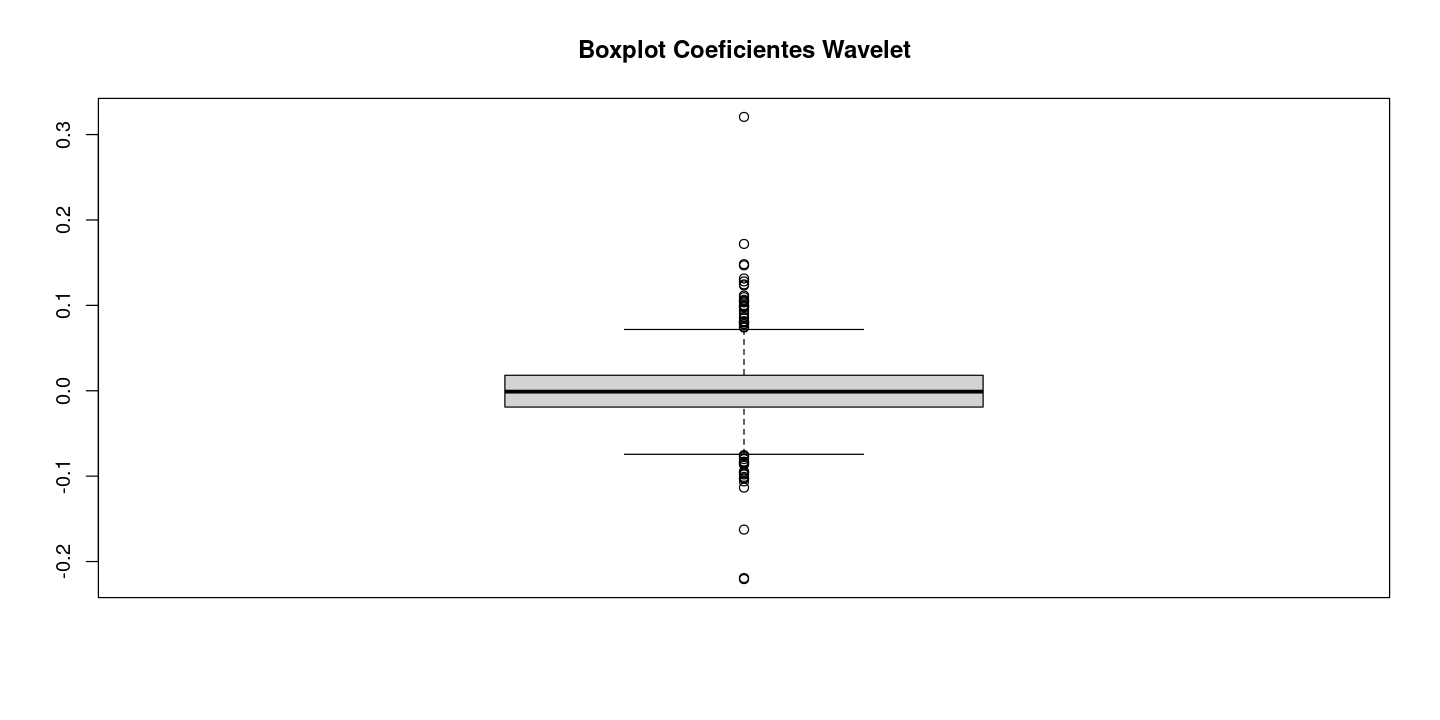

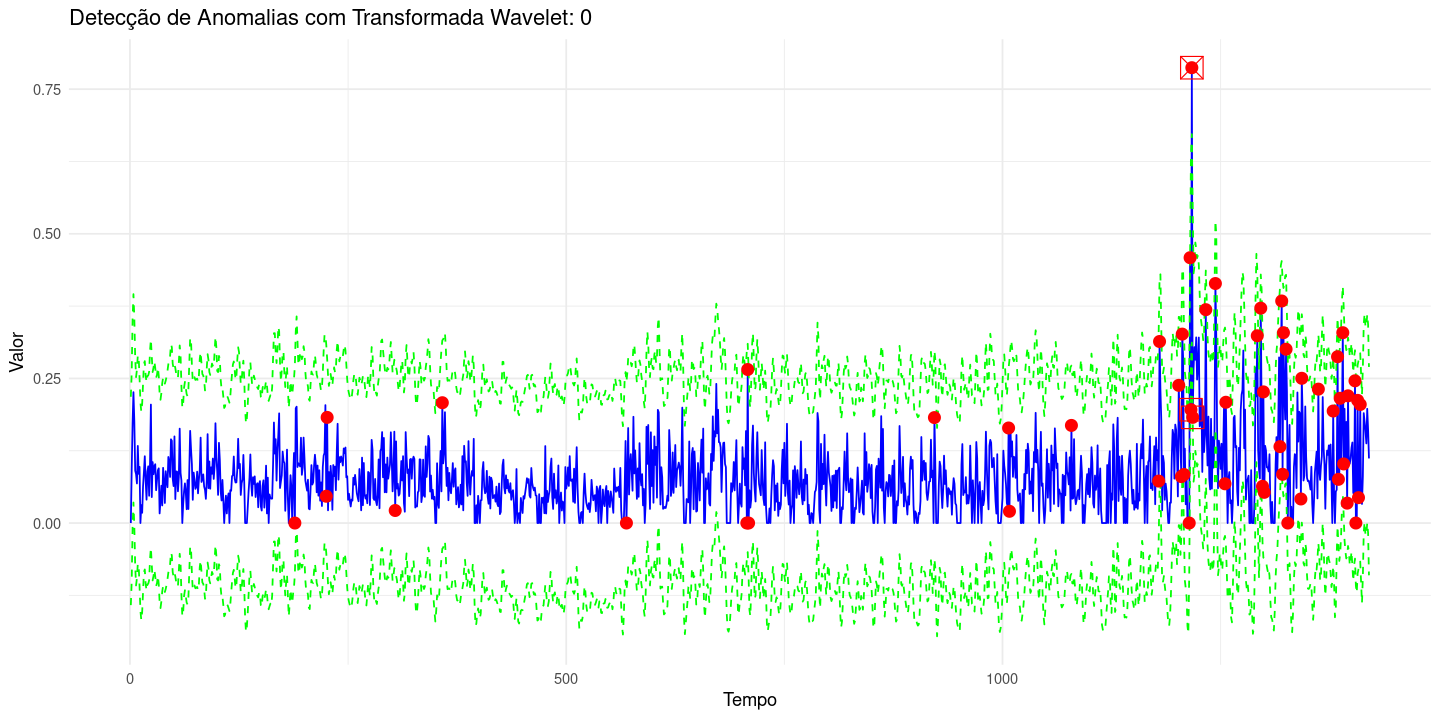

In [7]:
exemplos <- list(series$series)
desvios <- 7

options(repr.plot.width = 12, repr.plot.height = 6)

for (exemplo in exemplos){
  data <- exemplo
    # 1) Realizando a Transformada Wavelet Discreta
    wt <- WaveletT(data, filter="la8") # Opções de filtro: "haar", "d4", "la8", "bl14", "c6"
    
    # 2) Exibindo os coeficientes Wavelet
    #plot(wt$W1, main = "Coeficientes Wavelet (W1)", type="l")
    
    # 3) Calculando o componente de tendência dos coeficientes Wavelet
    wt_ct <- attr(wt,"wt_obj")
    n <- length(wt_ct@V)
    for (i in 1:length(wt_ct@W)) {
      wt_ct@W[[i]] <- as.matrix(rep(0, length(wt_ct@W[[i]])), ncol=1)
    }
    yhat <- WaveletT.rev(pred=NULL, wt_ct)
    
    # 4) Tratando os coeficientes Waveletwt@W$W1
    CoefWavelet <- wt$W1 
    # 4.1 Desconsiderando APENAS os 6% iniciais do vetor de coeficientes
    descarte <- ceiling(length(CoefWavelet)*0.06)
    CoefWavelet <-  CoefWavelet[-c(1:descarte)]
    #CoefWavelet <-  CoefWavelet[-c((length(CoefWavelet)-descarte+1) : length(CoefWavelet))]
    
    plot(CoefWavelet, main="Coeficientes Wavelet tratados", type="l")
    cw_tol <- mean(CoefWavelet) + (desvios * sd(CoefWavelet))
    lines(wt_ct@W$W1 + cw_tol, type="l", col="green")
    lines(wt_ct@W$W1 - cw_tol, type="l", col="green")
    
    # 5) Análise de outliers no vetor de coeficientes Wavelet
    candidatos <- boxplot(CoefWavelet, main = "Boxplot Coeficientes Wavelet")$out
    # 5.1 Exibindo os outliers como candidados a anomalias
    print("Candidatos à anomalias:")
    print(candidatos)
    limitecandidato <- min(abs(candidatos))
 
    # 6.4 Apresenta o menor limiar absoluto dentre os candidatos que atenderam ao critério de distãncia
    print(paste("Menor limiar absoluto dos candidatos=", limitecandidato))
    
    # 7) Marcação das anomalias
    # 7.1 Utilização do valor limiar automático para identificar as anomalias 
    threshold <- limitecandidato                  
    anomaly_wavelet <- which(abs(wt$W1) >= threshold)
    
    # Descarte APENAS dos 6% iniciais do vetor de coeficientes
    anomaly_wavelet <- anomaly_wavelet[anomaly_wavelet > descarte]
    #anomaly_wavelet <- anomaly_wavelet[anomaly_wavelet < length(CoefWavelet) -descarte]
    #print(paste("Anomalia:", anomaly_wavelet))   
    
    # 8) Ajuste do índice da anomalia para "sincronizar" com a série temporal original (W1 tem aproximadamente
    # a metade dos elementos que a série temporal original)
    anomaly <- (anomaly_wavelet * length(data) / length(wt$W1)) - 4
    anomaly <-  anomaly[anomaly > 0]
    #print(paste("Índice=", anomaly, "y_anomalia=", data[anomaly]))
    
    ySemCandidatos <- data
    ySemCandidatos <- ySemCandidatos[-anomaly]
    yhatSemCandidatos <- yhat
    yhatSemCandidatos <- yhatSemCandidatos[-anomaly]
    
    E <- abs(mean(ySemCandidatos-yhatSemCandidatos))
    DP <- sd(ySemCandidatos-yhatSemCandidatos)
    Tolerancia <- E + (desvios * DP)
    print(paste("Erro médio sinal original - predição =", E, "SD=", DP))
   
    anomaly_cw_tol <- which(abs(wt$W1) > cw_tol)
    anomaly_cw_tol <- anomaly_cw_tol[anomaly_cw_tol > descarte]
    anomaly_cw_tol <- (anomaly_cw_tol * length(data) / length(wt$W1)) - 4
    anomaly_cw_tol <- anomaly_cw_tol[anomaly_cw_tol > 0]
    
    anomaly_ap_tol <- c()
    for(anomalia in anomaly){
        if(data[anomalia] > yhat[anomalia] + Tolerancia || data[anomalia] < yhat[anomalia] - Tolerancia){
            anomaly_ap_tol <- c(anomaly_ap_tol, anomalia)
        }
    }
    
    
    # 9) Exibição do gráfico com a marcação da anomalia na série temporal original
    t <- 1:length(data)
    anomalia <- ggplot() + 
                geom_line(aes(x=t, y=data), color="blue") +
                #geom_line(aes(x=t, y=yhat), color="green", linetype = "dotted") +
                geom_line(aes(x=t, y=yhat+Tolerancia), color="green", linetype = "dashed") +
                geom_line(aes(x=t, y=yhat-Tolerancia), color="green", linetype = "dashed") +
                geom_point(aes(x=t[anomaly], y=data[anomaly]), color="red", size=3) +
                geom_point(aes(x=t[anomaly_cw_tol], y=data[anomaly_cw_tol]), color="red", size=6, shape=4) +
                geom_point(aes(x=t[anomaly_ap_tol], y=data[anomaly_ap_tol]), color="red", size=6, shape=0) +
                labs(title=paste("Detecção de Anomalias com Transformada Wavelet:", exemplo), x="Tempo", y="Valor") +
                theme_minimal()
    plot(anomalia)
}